# Installing and importing required modules

In [5]:
#!pip install pandas
#!pip install numpy
!pip install regex
!pip install nltk
!pip install sklearn

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regex as re
import random
import nltk
import multiprocessing
import umap.umap_ as umap
import umap.plot
import re
import string
import warnings
from tabulate import tabulate
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from joblib import Memory
from tempfile import mkdtemp
from string import punctuation
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
warnings.filterwarnings("ignore") 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/madhavsankar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/madhavsankar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/madhavsankar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
#Visualize Data in CSV
#Reading the CSV file using Pandas
data = pd.read_csv('Project_1_dataset_01_01_2022.csv')
data.head()

,Unnamed: 0,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,590,Having made a massive impact in Saudi Arabia w...,Having made a massive impact in Saudi Arabia w...,"['singhs', 'rooting', 'cool', 'saudi', 'style'...",NaN,[],https://www.msn.com/en-in/entertainment/other/...,cricket,sports
1,388,Cricket is all about the emotional rollercoast...,"No matter which team fans hope to win, every s...","['wants', 'fans', 'finals', 'cup', 'win', 'tou...",NaN,[],https://www.prnewswire.com:443/news-releases/c...,cricket,sports
2,423,New Zealand announces back-to-back tours next ...,New Zealand announces back-to-back tours next ...,"['test', 'west', 'tour', 'zealand', 'world', '...",2021-12-20 00:00:00,[],https://www.aljazeera.com/news/2021/12/20/cric...,cricket,sports
3,563,It's not the first time cricket fans in the co...,Billed as one of the pre-tournament favourites...,"['qualify', 'afghanistan', 'cup', 'world', 'ze...",NaN,[],https://www.msn.com/en-in/news/other/t20-world...,cricket,sports
4,634,An employee works on a computer terminal again...,"REUTERS/Sivaram VBENGALURU, Oct 11 (Reuters Br...","['success', 'tech', 'startup', 'talent', 'onli...",2021-10-11 00:00:00,['Una Galani'],https://www.reuters.com/breakingviews/india-in...,cricket,sports


In [7]:
#Displaying Data Statistics
data.describe(include=object)

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
count,2072,2072,2072,1125,2072,2072,2072,2072
unique,1931,1929,1976,743,780,2067,8,2
top,"Seacrest out, Ted Lasso in. Ryan Seacrest and ...","Seacrest out, Ted Lasso in.\nRyan Seacrest and...","['coach', 'team', 'halloween', 'lasso', 'seacr...",2021-10-29 00:00:00,[],https://www.msn.com/en-in/news/world/earthquak...,cricket,sports
freq,26,26,26,39,1002,2,259,1036


# Question 1

How many rows (samples) and columns (features) are present in the dataset? We got about 2000 samples.

In [8]:
#Reading the CSV file using Pandas
data = pd.read_csv('Project_1_dataset_01_01_2022.csv')
#print(data)

row_count, column_count = data.shape
print(data.info())
print('Number of rows: %d and number of columns: %d' %(row_count,column_count))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2072 non-null   int64 
 1   full_text     2072 non-null   object
 2   summary       2072 non-null   object
 3   keywords      2072 non-null   object
 4   publish_date  1125 non-null   object
 5   authors       2072 non-null   object
 6   url           2072 non-null   object
 7   leaf_label    2072 non-null   object
 8   root_label    2072 non-null   object
dtypes: int64(1), object(8)
memory usage: 145.8+ KB
None
Number of rows: 2072 and number of columns: 9


Histograms: Plot 3 histograms on : 
(a) The total number of alpha-numeric characters per data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis; 

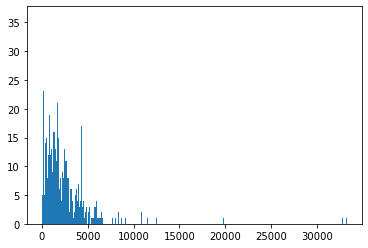

In [9]:
pattern = '[a-zA-Z0-9_]'
characters = []

for i in range(row_count):
    characters.append(len(re.findall(pattern, data['full_text'][i])))

num_bins = len(set(characters))
characters.sort(reverse=True)

plt.hist(characters, bins=num_bins)
plt.savefig('1a.png')
plt.show()


(b) The column leaf label – class on the x-axis; 

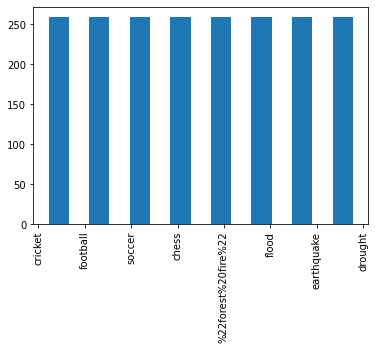

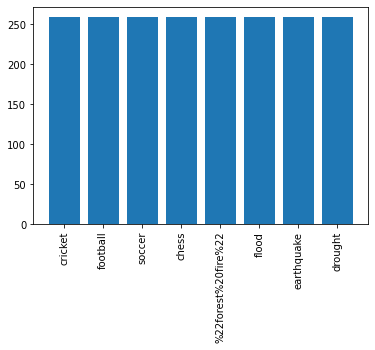

<Figure size 432x288 with 0 Axes>

In [10]:
a = data["leaf_label"].value_counts()
leaflabel_count = a.values
leaf_set = set(data.leaf_label.values)

fig, ax = plt.subplots()
ax.hist(data["leaf_label"], bins = len(leaf_set), rwidth = 0.5)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.savefig('1b.png')
plt.show()

D = Counter(data["leaf_label"])
fig, ax = plt.subplots()
ax.bar(range(len(D)), list(D.values()), align='center')
ax.set_xticks(range(len(D)))
ax.set_xticklabels(list(D.keys()), fontdict=None, minor=False)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()
plt.savefig('q1leafbar.png')

(c) The column root label – class on the x-axis.

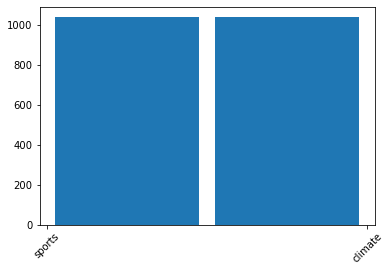

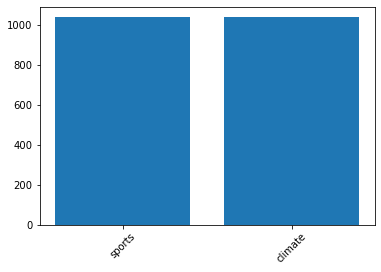

<Figure size 432x288 with 0 Axes>

In [11]:
a = data["root_label"].value_counts()
rootlabel_count = a.values
root_set = set(data.root_label.values)

fig, ax = plt.subplots()
ax.hist(data["root_label"], bins = len(root_set), rwidth = 0.9)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.savefig('1c.png')
plt.show()

D = Counter(data["root_label"])
fig, ax = plt.subplots()
ax.bar(range(len(D)), list(D.values()), align='center')
ax.set_xticks(range(len(D)))
ax.set_xticklabels(list(D.keys()), fontdict=None, minor=False)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()
plt.savefig('q1rootbar.png')

# Question 2

Report the Number of Training and Texting Samples

In [12]:
np.random.seed(42)
random.seed(42)
train, test = train_test_split(data[["full_text","root_label", "keywords", "summary"]], test_size=0.2)
print("Number of Training Samples:", len(train))
print("Number of Testing Samples:", len(test))

Number of Training Samples: 1657
Number of Testing Samples: 415


# Question 3

Feature Extraction

In [13]:
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

def remove_numbers(text):
    text_nonum = re.sub(r'\b[0-9]+\b\s*', '', text)
    clean_text = []
    for word in word_tokenize(text):
        if (not any(char.isdigit() for char in word)):
            clean_text.append(word)
    return (" ").join(clean_text)

def penn2morphy(penntag): 
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatized(text):
    lemmatizer = WordNetLemmatizer()

    sent_pos_tags = [pos_tag(word_tokenize(sent)) for sent in sent_tokenize(text)]
    pos_tags = []
    for sentence_tags in sent_pos_tags:
        for tags in sentence_tags:
            pos_tags.append(tags)
    
    lemmatized_words = []
    lemm_text = [lemmatizer.lemmatize(word, pos = penn2morphy(tag)) for word, tag in pos_tags]
    for lemma in lemm_text:
        if (not any(char in lemma for char in string.punctuation)):
            lemmatized_words.append(lemma.lower())
    return lemmatized_words

def stem(text):
    stemmer = PorterStemmer()
    stem_text = [stemmer.stem(word) for word in word_tokenize(text)]
    return " ".join(stem_text)

def preprocess(text):
    text = clean(text)
    text = remove_numbers(text)
    text = lemmatized(text)
    return ' '.join(text)

print(train['full_text'])
train['clean'] = train['full_text'].apply(lambda x:preprocess(x))
test['clean'] = test['full_text'].apply(lambda x:preprocess(x))
print(train['clean'])

1431    More than 1 million Washingtonians participate...
1567    A 4.7-magnitude earthquake rattled northwest S...
1044    More campgrounds are coming to the Auburn Stat...
175     Retro gamers will be able to relive all the jo...
1610    SAN SIMEON, Calif. (KGTV) — An earthquake with...
                              ...                        
1638    The redesigned Ford Ranger made its debut on W...
1095    (Newser) – A family that died on a hike in Cal...
1130    --News Direct--\n\nPano AI , the leader in wil...
1294    EAST TAWAS, Mich. – The public is invited to a...
860     If there’s a central theme to Edgar Wright’s n...
Name: full_text, Length: 1657, dtype: object
1431    more than million washingtonians participate i...
1567    a earthquake rattle northwest san luis obispo ...
1044    more campground be come to the auburn state re...
175     retro gamers will be able to relive all the jo...
1610    san simeon kgtv an earthquake with a prelimina...
                           

Report the shape of the TF-IDF-processed train and test matrices. The number of rows should match the results of Question 2. The number of columns should roughly be in the order of k×103. This dimension will vary depending on your exact method of cleaning and lemmatizing and that is okay.

In [14]:
count_vec = CountVectorizer(stop_words="english", min_df=3)
tfidf_tranformer = TfidfTransformer(use_idf=True)

word_count_vec_train = count_vec.fit_transform(train['clean'])
word_count_vec_train_tf = tfidf_tranformer.fit_transform(word_count_vec_train)
word_count_array_train = word_count_vec_train_tf.toarray()
word_counts_train = pd.DataFrame(data=word_count_array_train, columns = count_vec.get_feature_names())

print('TF-IDF Processed train matrix shape:', word_counts_train.shape)

word_count_vec_test = count_vec.transform(test['clean'])
word_count_vec_test_tf = tfidf_tranformer.transform(word_count_vec_test)
word_count_array_test = word_count_vec_test_tf.toarray()
word_counts_test = pd.DataFrame(data=word_count_array_test, columns = count_vec.get_feature_names())
print('TF-IDF Processed test matrix shape:', word_counts_test.shape)

TF-IDF Processed train matrix shape: (1657, 10056)
TF-IDF Processed test matrix shape: (415, 10056)


# Question 4

Plot the explained variance ratio across multiple different k = [1, 10, 50, 100, 200, 500, 1000, 2000] for LSI and for the next few sections choose k = 50. What does the explained variance ratio
plot look like? What does the plot’s concavity suggest?

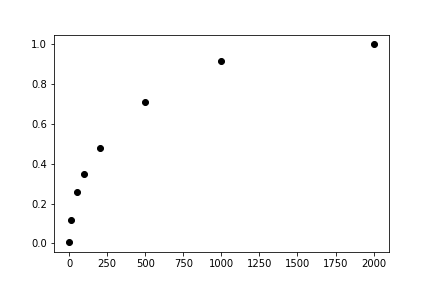

In [11]:
k = [1, 10, 50, 100, 200, 500, 1000, 2000]
explained_variance_ratio = []

for i in range(len(k)):
    svd_t = TruncatedSVD(n_components=k[i], random_state=42)
    svd_t.fit(word_counts_train)
    explained_variance_ratio.append(sum(svd_t.explained_variance_ratio_))

plt.plot(k, explained_variance_ratio, 'o', color='black');
plt.show()

In [15]:
k = 50
svd = TruncatedSVD(n_components = k)
#Fit the model on training data and then perform dimensionality reduction
x_LSI_train = svd.fit_transform(word_counts_train)
X_LSI_test = svd.transform(word_counts_test)

print('Dimensionality Reduction:')
print(word_counts_train.shape)
print(x_LSI_train.shape)

Dimensionality Reduction:
(1657, 10056)
(1657, 50)


With k = 50 found in the previous sections, calculate the reconstruction residual MSE error
when using LSI and NMF – they both should use the same k = 50. Which one is larger?

In [15]:
u, s, vh = np.linalg.svd(word_counts_train)
sd = np.diag(s)
vht = np.transpose(vh)

k = 50
LSI_FN = np.sum(np.square(np.array(word_counts_train - u[:,:k] @ sd[0:k,0:k] @ vh[:k,:])))
SIGMA_V = svd.components_
LSI_err = np.sum(np.square(np.array(word_counts_train - (x_LSI_train @SIGMA_V))))

#LSI_MSE = MSE(word_counts_train, (u[:,:k] @ sd[0:k,0:k] @ vh[:k,:]))
print("LSI Frobenius Norm:",LSI_FN)

model = NMF(n_components=50, init='random', random_state=42)
W = model.fit_transform(word_counts_train)
H = model.components_

NMF_FN = np.sum(np.square(np.array(word_counts_train - (W @ H))))
#NMF_MSE = MSE(word_counts_train, (W @ H))
print("NMF Frobenius Norm:",NMF_FN)
#We need value in 4000

if LSI_FN > NMF_FN:
    print('Loss of LSI is larger')
elif LSI_FN < NMF_FN:
    print('Loss of NMF is larger')

LSI Frobenius Norm: 1188.1793247897397
NMF Frobenius Norm: 1211.9080259600187
Loss of NMF is larger


# Question 5

-Train one SVM with γ = 1000 (hard margin), another with γ = 0.0001 (soft margin) on Dimensionality Reduced Data using LSI Method with any preferred value of K

In [16]:
#Import for Classifier metrics Calculation- from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
def Classifier_Metrics(y_test,y_pred,name="",average='binary'):
    print("Accuracy score for %s: %f" %(name,accuracy_score(y_test,y_pred)))
    print("Recall score for %s: %f" % (name,recall_score(y_test,y_pred,average=average)))
    print("Precision score for %s: %f" % (name,precision_score(y_test,y_pred,average=average)))
    print("F-1 score for %s: %f" % (name,f1_score(y_test,y_pred,average=average)))

In [17]:
# Computing Hard and Soft Margin SVMs
hardMargin_SVM=svm.SVC(kernel='linear',C=1000, random_state=42)

softMargin_SVM=svm.SVC(kernel='linear',C=0.0001, random_state=42)

# Normalise Train dataset and Test dataset to make them compatible for Binary classification
True_labels_Train=train.root_label.values
True_labels_Test=test.root_label.values
X_True_Train=[]

# Making True Train and Test labels compatible for Binary Classification
for label in True_labels_Train:
    if label=='sports':
        X_True_Train.append(0)
    else:
        X_True_Train.append(1)
X_True_Test=[]

for label in True_labels_Test:
    if label=='sports':
        X_True_Test.append(0)
    else:
        X_True_Test.append(1)

X_hardSVM_pred = hardMargin_SVM.fit(x_LSI_train,X_True_Train).predict(X_LSI_test) # predicting labels for hard margin SVM
X_softSVM_pred = softMargin_SVM.fit(x_LSI_train,X_True_Train).predict(X_LSI_test) # predicting labels for soft margin SVM

Classifier_Metrics(X_True_Test,X_hardSVM_pred,name="Hard Margin SVM")
Classifier_Metrics(X_True_Test,X_softSVM_pred,name="Soft Margin SVM")

Accuracy score for Hard Margin SVM: 0.966265
Recall score for Hard Margin SVM: 0.956311
Precision score for Hard Margin SVM: 0.975248
F-1 score for Hard Margin SVM: 0.965686
Accuracy score for Soft Margin SVM: 0.496386
Recall score for Soft Margin SVM: 1.000000
Precision score for Soft Margin SVM: 0.496386
F-1 score for Soft Margin SVM: 0.663446


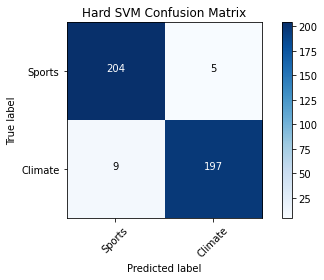

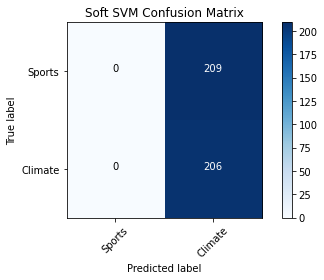

In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
class_names=["Sports","Climate"]
hardSVM_cm = confusion_matrix(X_True_Test,X_hardSVM_pred) # Hard SVM Confusion matrix
plt.figure(); plot_confusion_matrix(hardSVM_cm, classes=class_names, title='Hard SVM Confusion Matrix') 
softSVM_cm = confusion_matrix(X_True_Test,X_softSVM_pred) # Soft SVM Confusion matrix
plt.figure(); plot_confusion_matrix(softSVM_cm, classes=class_names, title='Soft SVM Confusion Matrix')

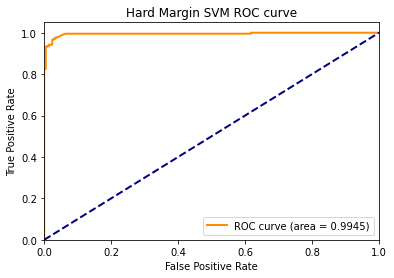

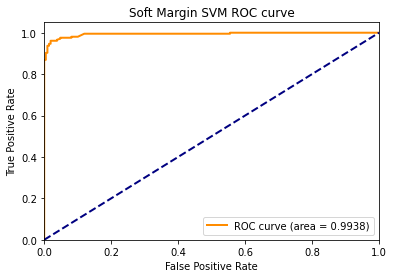

In [19]:
#ROC Curves
def ROC_curve(y_test,decision_function,name=""):
    fpr = dict();tpr = dict();roc_auc = dict()
    fpr, tpr, thresholds = roc_curve(y_test, decision_function)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
    plt.title('%s ROC curve' % name);plt.legend(loc="lower right")

ROC_curve(X_True_Test,hardMargin_SVM.decision_function(X_LSI_test),name="Hard Margin SVM") # Hard SVM ROC curve 
ROC_curve(X_True_Test,softMargin_SVM.decision_function(X_LSI_test),name="Soft Margin SVM") # Soft SVM ROC curve 


Accuracy score for High Hard Margin SVM: 0.966265
Recall score for High Hard Margin SVM: 0.951456
Precision score for High Hard Margin SVM: 0.980000
F-1 score for High Hard Margin SVM: 0.965517


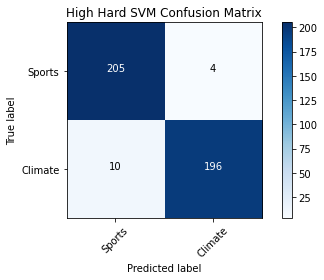

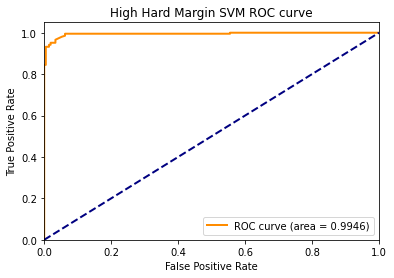

In [20]:
#Hard Margin- gamma=100000
HighHardMargin_SVM=svm.SVC(kernel='linear',C=100000, random_state=42)
X_HighhardSVM_pred=HighHardMargin_SVM.fit(x_LSI_train,X_True_Train).predict(X_LSI_test)
Classifier_Metrics(X_True_Test,X_HighhardSVM_pred,name="High Hard Margin SVM")
HighhardSVM_cm = confusion_matrix(X_True_Test,X_HighhardSVM_pred) # Hard SVM Confusion matrix
plt.figure(); plot_confusion_matrix(HighhardSVM_cm, classes=class_names, title='High Hard SVM Confusion Matrix') 
ROC_curve(X_True_Test,HighHardMargin_SVM.decision_function(X_LSI_test),name="High Hard Margin SVM")

Use cross-validation to choose γ (use average validation 3 accuracy to compare): Using a
5-fold cross-validation, find the best value of the parameter γ in the range {10k| − 3 ≤ k ≤
6, k ∈ Z}.

0.001: 0.500906344 accuracy with a standard deviation of 0.00
0.010: 0.500906344 accuracy with a standard deviation of 0.00
0.100: 0.941455247 accuracy with a standard deviation of 0.01
1.000: 0.942052197 accuracy with a standard deviation of 0.01
10.000: 0.952917410 accuracy with a standard deviation of 0.01
100.000: 0.955334328 accuracy with a standard deviation of 0.01
1000.000: 0.958952426 accuracy with a standard deviation of 0.01
10000.000: 0.954122229 accuracy with a standard deviation of 0.01
100000.000: 0.952911950 accuracy with a standard deviation of 0.01
1000000.000: 0.953516180 accuracy with a standard deviation of 0.01
Best Gamma:  1000
Accuracy score for Best Hard Margin SVM: 0.966265
Recall score for Best Hard Margin SVM: 0.956311
Precision score for Best Hard Margin SVM: 0.975248
F-1 score for Best Hard Margin SVM: 0.965686


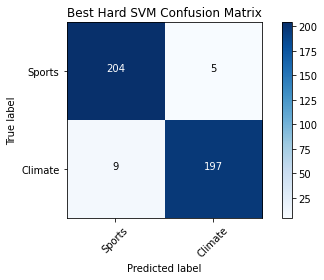

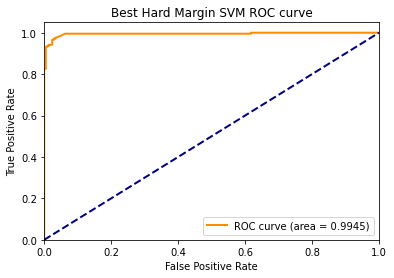

In [21]:
gamma=[0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]

best_gamma = 0.001
best_accuracy = 0

# Cross validation/scoring should happen on the training data
for g in gamma:
    clf = svm.SVC(kernel='linear', C=g, random_state=42)
    scores = cross_val_score(clf, x_LSI_train, X_True_Train, cv=5)
    print("%0.3f: %0.9f accuracy with a standard deviation of %0.2f" % (g, scores.mean(), scores.std()))
    if scores.mean() > best_accuracy:
        best_accuracy = scores.mean()
        best_gamma = g

print('Best Gamma: ', best_gamma)

BestHardMargin_SVM=svm.SVC(kernel='linear',C=best_gamma, random_state=42)   
X_BesthardSVM_pred=BestHardMargin_SVM.fit(x_LSI_train,X_True_Train).predict(X_LSI_test)
Classifier_Metrics(X_True_Test,X_BesthardSVM_pred,name="Best Hard Margin SVM")
Best_HighhardSVM_cm = confusion_matrix(X_True_Test,X_BesthardSVM_pred)
plt.figure(); plot_confusion_matrix(Best_HighhardSVM_cm, classes=class_names, title='Best Hard SVM Confusion Matrix') 
ROC_curve(X_True_Test,BestHardMargin_SVM.decision_function(X_LSI_test),name="Best Hard Margin SVM")

# Question 6
Evaluate a logistic classifier:

Train a logistic classifier without regularization (you may need to come up with some way to
approximate this if you use sklearn.linear model.LogisticRegression); plot the ROC
curve and report the confusion matrix and calculate the accuracy, recall precision and F-1
score of this classifier on the testing set.

Accuracy score for Logistic Regression without regularization: 0.966265
Recall score for Logistic Regression without regularization: 0.956311
Precision score for Logistic Regression without regularization: 0.975248
F-1 score for Logistic Regression without regularization: 0.965686


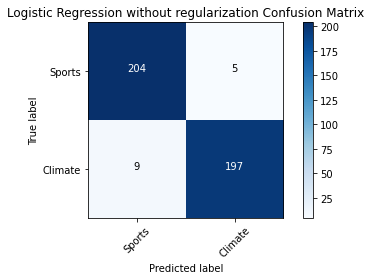

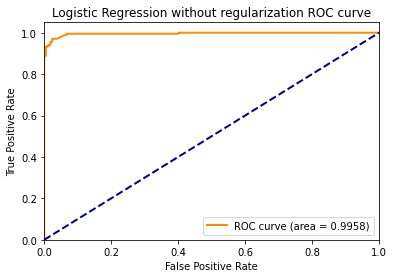

In [22]:
LR = LogisticRegression(penalty = 'none', random_state = 42)
pred_lr = LR.fit(x_LSI_train,X_True_Train).predict(X_LSI_test)

Classifier_Metrics(X_True_Test, pred_lr, name="Logistic Regression without regularization")
Logistics_Regression_cm = confusion_matrix(X_True_Test,pred_lr)
plt.figure(); plot_confusion_matrix(Logistics_Regression_cm, classes=class_names, title='Logistic Regression without regularization Confusion Matrix') 
ROC_curve(X_True_Test,LR.decision_function(X_LSI_test),name="Logistic Regression without regularization")

Find the optimal regularization coefficient
Using 5-fold cross-validation on the dimension-reduced-by-SVD training data, find the optimal
regularization strength in the range {10k|−4 ≤ k ≤ 4, k ∈ Z} for logistic regression
with L1 regularization and logistic regression with L2 regularization, respectively.



Optimal Regularization coefficient search for L1 Regularization

L1 Regularization Scores
0.50 accuracy with a standard deviation of 0.00
0.50 accuracy with a standard deviation of 0.00
0.50 accuracy with a standard deviation of 0.00
0.90 accuracy with a standard deviation of 0.02
0.96 accuracy with a standard deviation of 0.01
0.96 accuracy with a standard deviation of 0.01
0.96 accuracy with a standard deviation of 0.01
0.96 accuracy with a standard deviation of 0.01
0.96 accuracy with a standard deviation of 0.01
Best k =  100
L2 Regularization Scores:
0.92 accuracy with a standard deviation of 0.01
0.94 accuracy with a standard deviation of 0.01
0.95 accuracy with a standard deviation of 0.01
0.95 accuracy with a standard deviation of 0.02
0.95 accuracy with a standard deviation of 0.01
0.96 accuracy with a standard deviation of 0.01
0.96 accuracy with a standard deviation of 0.01
0.96 accuracy with a standard deviation of 0.01
0.96 accuracy with a standard deviation of 0.01
Best k =  1000
Performance with L1 Regularization
Accuracy score for Lo

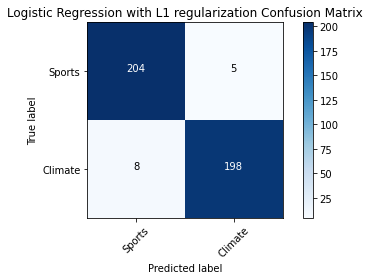

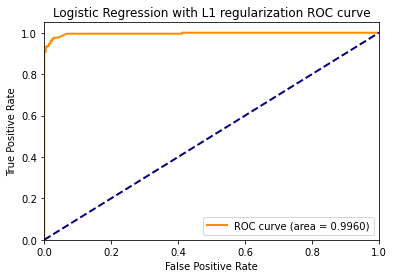

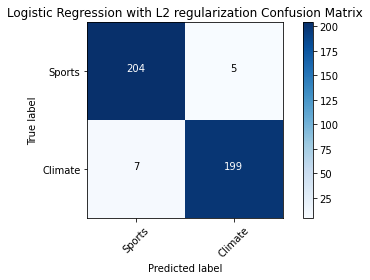

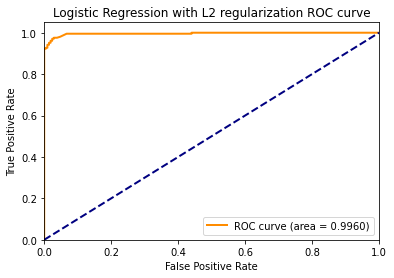

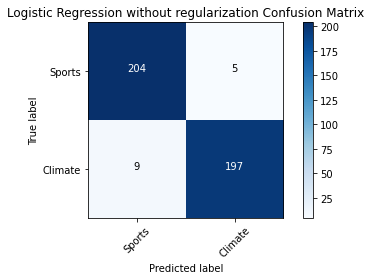

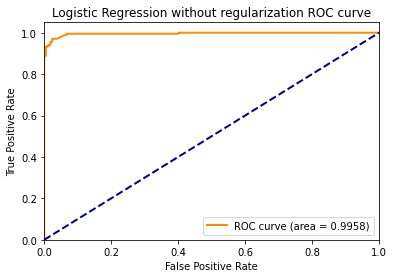

In [23]:
#Using liblinear

l1reg=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

#Need to choose Solvers which support both L1 and L2 regularization
#Saga, Liblinear solvers support both

acc_l1 = []
mean_coeff_l1 = []
acc_l2 = []
mean_coeff_l2 = []
l1bestk = 0
best_accuracy = 0
print("L1 Regularization Scores")

for l1 in l1reg:
    LR = LogisticRegression( penalty='l1',random_state = 42,solver='liblinear', C=l1)
    pred_lr = LR.fit(x_LSI_train,X_True_Train).predict(X_LSI_test)
    scores = cross_val_score(LR, x_LSI_train, X_True_Train, cv=5)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    acc_l1.append(accuracy_score(X_True_Test, pred_lr))
    mean_coeff_l1.append(np.mean(LR.coef_))
    if scores.mean() > best_accuracy:
        best_accuracy = scores.mean()
        l1bestk = l1

print("Best k = ", l1bestk)

print("L2 Regularization Scores:")
l2bestk = 0
best_accuracy = 0

for l2 in l1reg:
    LR = LogisticRegression( penalty='l2',random_state = 42,solver='liblinear', C=l2)
    pred_lr = LR.fit(x_LSI_train,X_True_Train).predict(X_LSI_test)
    scores = cross_val_score(LR, x_LSI_train, X_True_Train, cv=5)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    acc_l2.append(accuracy_score(X_True_Test, pred_lr))
    mean_coeff_l2.append(np.mean(LR.coef_))
    if scores.mean() > best_accuracy:
        best_accuracy = scores.mean()
        l2bestk = l2

print("Best k = ", l2bestk)

#Performance with L1 Regularization
print("Performance with L1 Regularization")
LR = LogisticRegression( penalty='l1',random_state = 42,solver='liblinear', C=l1bestk)
pred_lr = LR.fit(x_LSI_train,X_True_Train).predict(X_LSI_test)
Classifier_Metrics(X_True_Test, pred_lr, name="Logistic Regression with L1 regularization")
Logistics_Regression_cm = confusion_matrix(X_True_Test,pred_lr) 
plt.figure(); plot_confusion_matrix(Logistics_Regression_cm, classes=class_names, title='Logistic Regression with L1 regularization Confusion Matrix') 
ROC_curve(X_True_Test,LR.decision_function(X_LSI_test),name="Logistic Regression with L1 regularization")

#Performance with L2 Regularization
print("Performance with L2 Regularization")
LR = LogisticRegression( penalty='l2',random_state = 42,solver='liblinear', C=l2bestk)
pred_lr = LR.fit(x_LSI_train,X_True_Train).predict(X_LSI_test)
Classifier_Metrics(X_True_Test, pred_lr, name="Logistic Regression with L2 regularization")
Logistics_Regression_cm = confusion_matrix(X_True_Test,pred_lr) 
plt.figure(); plot_confusion_matrix(Logistics_Regression_cm, classes=class_names, title='Logistic Regression with L2 regularization Confusion Matrix') 
ROC_curve(X_True_Test,LR.decision_function(X_LSI_test),name="Logistic Regression with L2 regularization")

#Performance with no Regularization
print("Performance with L2 Regularization")
LR = LogisticRegression( penalty='none',random_state = 42)
pred_lr = LR.fit(x_LSI_train,X_True_Train).predict(X_LSI_test)
Classifier_Metrics(X_True_Test, pred_lr, name="Logistic Regression without regularization")
Logistics_Regression_cm = confusion_matrix(X_True_Test,pred_lr) 
plt.figure(); plot_confusion_matrix(Logistics_Regression_cm, classes=class_names, title='Logistic Regression without regularization Confusion Matrix') 
ROC_curve(X_True_Test,LR.decision_function(X_LSI_test),name="Logistic Regression without regularization")


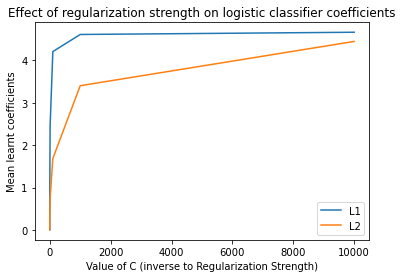

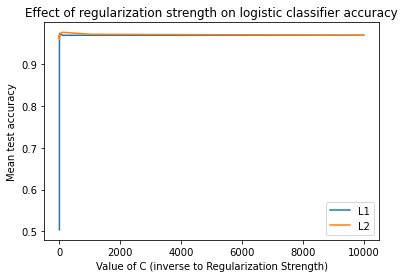

In [24]:
plt.title('Effect of regularization strength on logistic classifier coefficients')
plt.plot(l1reg,mean_coeff_l1,label='L1')
plt.plot(l1reg,mean_coeff_l2,label='L2')
plt.xlabel('Value of C (inverse to Regularization Strength)')
plt.ylabel('Mean learnt coefficients')
plt.legend()
plt.savefig('6a.png',dpi=300,bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
plt.title('Effect of regularization strength on logistic classifier accuracy')
plt.plot(l1reg,acc_l1,label='L1')
plt.plot(l1reg,acc_l2,label='L2')
plt.xlabel('Value of C (inverse to Regularization Strength)')
plt.ylabel('Mean test accuracy')
plt.legend()
plt.savefig('6b.png',dpi=300,bbox_inches='tight')
plt.show()

# Question 7

Evaluate and profile a Naive Bayes classifier: Train a GaussianNB classifier; plot
the ROC curve and report the confusion matrix and calculate the accuracy, recall, precision and
F-1 score of this classifier on the testing set.

Accuracy score for Naive Bayes Classifier: 0.949398
Recall score for Naive Bayes Classifier: 0.966019
Precision score for Naive Bayes Classifier: 0.934272
F-1 score for Naive Bayes Classifier: 0.949881


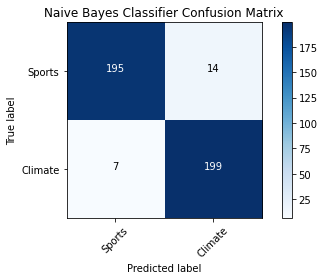

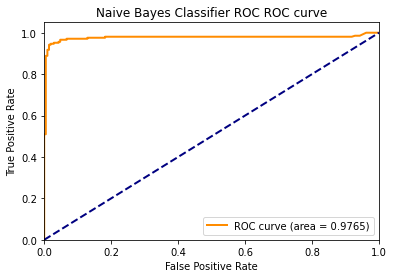

In [25]:
GNB = GaussianNB()
GNB_pred_Y = GNB.fit(x_LSI_train,X_True_Train).predict(X_LSI_test) 
Classifier_Metrics(X_True_Test, GNB_pred_Y, name="Naive Bayes Classifier")
GNB_pred_Y_cm = confusion_matrix(X_True_Test,GNB_pred_Y)
plt.figure() 
plot_confusion_matrix(GNB_pred_Y_cm, classes=class_names, title='Naive Bayes Classifier Confusion Matrix') 
#Gaussian Naive Bayes Estimator does not have decision function attribute- cannot get confidence scores on samples
#So use Prediction probability estimate of test vectors for plotting ROC curve
ROC_curve(X_True_Test,GNB.predict_proba(X_LSI_test)[:,1],name="Naive Bayes Classifier ROC")

# Question 8
In this part, you will attempt to find the best model for binary classification

Q8- a- Construct a Pipeline that performs feature extraction, dimensionality reduction and classification;

We have divided the grid search into these components:

    - Clean Data:
        - Dimensionality Reduction by SVD
        - NMF5
        - NMF50
        - NMF500
        
    - Unclean Data:
        - Dimensionality Reduction by SVD
        - NMF5
        - NMF50
        - NMF500

### CLEAN SVDS

In [28]:
def remove_numbers(text):
    text_nonum = re.sub(r'\b[0-9]+\b\s*', '', text)
    clean_text = []
    for word in word_tokenize(text):
        if (not any(char.isdigit() for char in word)):
            clean_text.append(word)
    return (" ").join(clean_text)

def clean_data(text):
  text = clean(text)
  text = remove_numbers(text)
  return text

def donothing(sentence):    
    words = []
    for word in word_tokenize(sentence):
        if (not any(char in word for char in punctuation)):
            words.append(word)
    return words

def penn2morphy(penntag): 
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatized(text):
    lemmatizer = WordNetLemmatizer()

    sent_pos_tags = [pos_tag(word_tokenize(sent)) for sent in sent_tokenize(text)]
    pos_tags = []
    for sentence_tags in sent_pos_tags:
        for tags in sentence_tags:
            pos_tags.append(tags)
    
    lemmatized_words = []
    lemm_text = [lemmatizer.lemmatize(word, pos = penn2morphy(tag)) for word, tag in pos_tags]
    for lemma in lemm_text:
        if (not any(char in lemma for char in punctuation)):
            lemmatized_words.append(lemma.lower())
    return lemmatized_words

def stemmed(text):
    stemmer = PorterStemmer()
    stemmed_words = []
    for word in word_tokenize(text):
        if (not any(char in word for char in punctuation)):
            stemmed_words.append(stemmer.stem(word))
    return stemmed_words

steps = [('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', None), ('clf', None),]
pipeline = Pipeline(steps)

param_grid = [
    {
        'vect__min_df': (3,5),
        'vect__analyzer': (lemmatized,stemmed,donothing),
        'reduce_dim': (TruncatedSVD(n_components=5, random_state=42), 
                       TruncatedSVD(n_components=50, random_state=42), 
                       TruncatedSVD(n_components=500, random_state=42),
                      ), 
        'clf': (svm.SVC(kernel='linear',C=1000,random_state=42),
                GaussianNB(),
                LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear',),
                LogisticRegression(penalty='l2',C=10,random_state=42,solver='liblinear')),  
    }
]

grid = GridSearchCV(pipeline, cv = 5, param_grid = param_grid, scoring = 'accuracy', verbose = 5)

train['cleanData'] = train['full_text'].apply(lambda x:clean_data(x))
test['cleanData'] = test['full_text'].apply(lambda x:clean_data(x))

grid.fit(train['cleanData'], X_True_Train)
print("Best estimator for Clean Data: ", grid.best_estimator_)
print("Best parameters for Clean Data: ", grid.best_params_)
print("Best score for Clean Data: ", grid.best_score_)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7ff770eceaf0>, vect__min_df=3;, score=0.922 total time=  33.5s
[CV 2/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7ff770eceaf0>, vect__min_df=3;, score=0.916 total time=  32.8s
[CV 3/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7ff770eceaf0>, vect__min_df=3;, score=0.906 total time=  32.9s
[CV 4/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7ff770eceaf0>, vect__min_df=3;, score=0.909 total time=  32.7s
[CV 5/5] END clf=SVC(C=1000, kerne

In [37]:
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
pd.set_option('display.max_colwidth', None)
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

svds = grid

### CLEAN NMF500

In [54]:
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir)

steps = [('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', None), ('clf', None),]
pipeline = Pipeline(steps, memory=memory)

param_grid = [
    {
        'vect__min_df': (3,5),
        'vect__analyzer': (lemmatized,stemmed,donothing),
        'reduce_dim': (
                       NMF(n_components=500, init='random', random_state=42, max_iter = 100000),
                      ), 
        'clf': (svm.SVC(kernel='linear',C=1000,random_state=42),
                GaussianNB(),
                LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear',),
                LogisticRegression(penalty='l2',C=10,random_state=42,solver='liblinear')),  
    }
]

grid = GridSearchCV(pipeline, cv = 5, param_grid = param_grid, scoring = 'accuracy', verbose = 5)

train['cleanData'] = train['full_text'].apply(lambda x:clean_data(x))
test['cleanData'] = test['full_text'].apply(lambda x:clean_data(x))

grid.fit(train['cleanData'], X_True_Train)
print("Best estimator for Clean Data: ", grid.best_estimator_)
print("Best parameters for Clean Data: ", grid.best_params_)
print("Best score for Clean Data: ", grid.best_score_)

/var/folders/_3/nbqjnf7n6g96vdq2stjx78sr0000gn/T/ipykernel_13357/4212146147.py:2: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/var/folders/_3/nbqjnf7n6g96vdq2stjx78sr0000gn/T/tmpdk63mifd'", use "location='/var/folders/_3/nbqjnf7n6g96vdq2stjx78sr0000gn/T/tmpdk63mifd'" instead.
  memory = Memory(cachedir=cachedir)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemmatized at 0x7ff742514820>, min_df=3,
                stop_words='english'), 
1782                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.1s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x9101 sparse matrix of type '<class 'numpy.int64'>'
	with 241066 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.16s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.7s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x9187 sparse matrix of type '<class 'numpy.int64'>'
	with 239452 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.20s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.5s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8973 sparse matrix of type '<class 'numpy.int64'>'
	with 234253 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.20s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.6s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x9044 sparse matrix of type '<class 'numpy.int64'>'
	with 240375 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.20s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 27.0s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x9233 sparse matrix of type '<class 'numpy.int64'>'
	with 241007 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.7s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x6227 sparse matrix of type '<class 'numpy.int64'>'
	with 231384 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 30.7s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x6267 sparse matrix of type '<class 'numpy.int64'>'
	with 229601 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.19s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.0s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x6125 sparse matrix of type '<class 'numpy.int64'>'
	with 224641 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.11s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.3s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x6219 sparse matrix of type '<class 'numpy.int64'>'
	with 230881 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.7s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x6252 sparse matrix of type '<class 'numpy.int64'>'
	with 230929 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x7687 sparse matrix of type '<class 'numpy.int64'>'
	with 245462 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x7781 sparse matrix of type '<class 'numpy.int64'>'
	with 243781 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x7626 sparse matrix of type '<class 'numpy.int64'>'
	with 238725 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.9s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x7672 sparse matrix of type '<class 'numpy.int64'>'
	with 244818 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 13.1s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x7799 sparse matrix of type '<class 'numpy.int64'>'
	with 245293 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x5477 sparse matrix of type '<class 'numpy.int64'>'
	with 238002 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x5514 sparse matrix of type '<class 'numpy.int64'>'
	with 236164 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.6s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x5398 sparse matrix of type '<class 'numpy.int64'>'
	with 231208 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 13.2s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x5458 sparse matrix of type '<class 'numpy.int64'>'
	with 237366 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.8s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x5494 sparse matrix of type '<class 'numpy.int64'>'
	with 237475 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.19s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x12611 sparse matrix of type '<class 'numpy.int64'>'
	with 266413 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x12748 sparse matrix of type '<class 'numpy.int64'>'
	with 264455 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.9s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x12429 sparse matrix of type '<class 'numpy.int64'>'
	with 258311 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.9s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x12477 sparse matrix of type '<class 'numpy.int64'>'
	with 265156 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.8s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x12814 sparse matrix of type '<class 'numpy.int64'>'
	with 266184 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.8s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x8446 sparse matrix of type '<class 'numpy.int64'>'
	with 252295 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.6s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x8430 sparse matrix of type '<class 'numpy.int64'>'
	with 249850 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.13s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8307 sparse matrix of type '<class 'numpy.int64'>'
	with 244420 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.4s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8444 sparse matrix of type '<class 'numpy.int64'>'
	with 251536 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.16s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8461 sparse matrix of type '<class 'numpy.int64'>'
	with 251472 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 36.6s, 0.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1657x10366 sparse matrix of type '<class 'numpy.int64'>'
	with 301838 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

In [55]:
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(results_df[["params", "mean_test_score"]])

nmf500 = grid

                                                                                                                                                                                                                                                      params  \
6                                                                  {'clf': GaussianNB(), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=500, random_state=42), 'vect__analyzer': <function lemmatized at 0x7ff742514820>, 'vect__min_df': 3}   
0                                 {'clf': SVC(C=1000, kernel='linear', random_state=42), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=500, random_state=42), 'vect__analyzer': <function lemmatized at 0x7ff742514820>, 'vect__min_df': 3}   
11                                                                  {'clf': GaussianNB(), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=500, random_state=42), 'vect__analyzer': <function donothing at 0x7ff655edea60>

### CLEAN NMF5

In [62]:
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir)

steps = [('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', None), ('clf', None),]
pipeline = Pipeline(steps, memory=memory)

param_grid = [
    {
        'vect__min_df': (3,5),
        'vect__analyzer': (lemmatized,stemmed,donothing),
        'reduce_dim': (
                       NMF(n_components=5, init='random', random_state=42, max_iter = 100000),
                      ), 
        'clf': (svm.SVC(kernel='linear',C=1000,random_state=42),
                GaussianNB(),
                LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear',),
                LogisticRegression(penalty='l2',C=10,random_state=42,solver='liblinear')),  
    }
]

grid = GridSearchCV(pipeline, cv = 5, param_grid = param_grid, scoring = 'accuracy', verbose = 5)

train['cleanData'] = train['full_text'].apply(lambda x:clean_data(x))
test['cleanData'] = test['full_text'].apply(lambda x:clean_data(x))

grid.fit(train['cleanData'], X_True_Train)
print("Best estimator for Clean Data: ", grid.best_estimator_)
print("Best parameters for Clean Data: ", grid.best_params_)
print("Best score for Clean Data: ", grid.best_score_)

/var/folders/_3/nbqjnf7n6g96vdq2stjx78sr0000gn/T/ipykernel_13357/3141669187.py:2: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/var/folders/_3/nbqjnf7n6g96vdq2stjx78sr0000gn/T/tmpkjx0hz8k'", use "location='/var/folders/_3/nbqjnf7n6g96vdq2stjx78sr0000gn/T/tmpkjx0hz8k'" instead.
  memory = Memory(cachedir=cachedir)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemmatized at 0x7ff742514820>, min_df=3,
                stop_words='english'), 
1782                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.19s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.0s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x9101 sparse matrix of type '<class 'numpy.int64'>'
	with 241066 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.0s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x9187 sparse matrix of type '<class 'numpy.int64'>'
	with 239452 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 25.7s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8973 sparse matrix of type '<class 'numpy.int64'>'
	with 234253 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 25.9s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x9044 sparse matrix of type '<class 'numpy.int64'>'
	with 240375 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.3s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x9233 sparse matrix of type '<class 'numpy.int64'>'
	with 241007 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.1s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x6227 sparse matrix of type '<class 'numpy.int64'>'
	with 231384 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 25.9s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x6267 sparse matrix of type '<class 'numpy.int64'>'
	with 229601 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 27.3s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x6125 sparse matrix of type '<class 'numpy.int64'>'
	with 224641 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.32s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.4s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x6219 sparse matrix of type '<class 'numpy.int64'>'
	with 230881 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.4s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x6252 sparse matrix of type '<class 'numpy.int64'>'
	with 230929 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.9s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x7687 sparse matrix of type '<class 'numpy.int64'>'
	with 245462 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.6s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x7781 sparse matrix of type '<class 'numpy.int64'>'
	with 243781 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.4s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x7626 sparse matrix of type '<class 'numpy.int64'>'
	with 238725 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.5s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x7672 sparse matrix of type '<class 'numpy.int64'>'
	with 244818 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x7799 sparse matrix of type '<class 'numpy.int64'>'
	with 245293 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.6s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x5477 sparse matrix of type '<class 'numpy.int64'>'
	with 238002 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.6s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x5514 sparse matrix of type '<class 'numpy.int64'>'
	with 236164 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.11s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.3s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x5398 sparse matrix of type '<class 'numpy.int64'>'
	with 231208 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.6s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x5458 sparse matrix of type '<class 'numpy.int64'>'
	with 237366 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x5494 sparse matrix of type '<class 'numpy.int64'>'
	with 237475 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x12611 sparse matrix of type '<class 'numpy.int64'>'
	with 266413 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.4s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x12748 sparse matrix of type '<class 'numpy.int64'>'
	with 264455 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x12429 sparse matrix of type '<class 'numpy.int64'>'
	with 258311 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.4s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x12477 sparse matrix of type '<class 'numpy.int64'>'
	with 265156 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x12814 sparse matrix of type '<class 'numpy.int64'>'
	with 266184 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x8446 sparse matrix of type '<class 'numpy.int64'>'
	with 252295 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x8430 sparse matrix of type '<class 'numpy.int64'>'
	with 249850 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8307 sparse matrix of type '<class 'numpy.int64'>'
	with 244420 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.4s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8444 sparse matrix of type '<class 'numpy.int64'>'
	with 251536 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.4s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8461 sparse matrix of type '<class 'numpy.int64'>'
	with 251472 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 33.5s, 0.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1657x10366 sparse matrix of type '<class 'numpy.int64'>'
	with 301838 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

In [63]:
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(results_df[["params", "mean_test_score"]])

results_df.to_csv('nmf5.csv', sep='\t', encoding='utf-8')
nmf5 = grid

                                                                                                                                                                                                                                                    params  \
0                                 {'clf': SVC(C=1000, kernel='linear', random_state=42), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=5, random_state=42), 'vect__analyzer': <function lemmatized at 0x7ff742514820>, 'vect__min_df': 3}   
12  {'clf': LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear'), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=5, random_state=42), 'vect__analyzer': <function lemmatized at 0x7ff742514820>, 'vect__min_df': 3}   
1                                 {'clf': SVC(C=1000, kernel='linear', random_state=42), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=5, random_state=42), 'vect__analyzer': <function lemmatized at 0x7ff742514820>, 'vect_

### CLEAN NMF50

In [64]:
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir)

steps = [('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', None), ('clf', None),]
pipeline = Pipeline(steps, memory=memory)

param_grid = [
    {
        'vect__min_df': (3,5),
        'vect__analyzer': (lemmatized,stemmed,donothing),
        'reduce_dim': (
                       NMF(n_components=50, init='random', random_state=42, max_iter = 100000),
                      ), 
        'clf': (svm.SVC(kernel='linear',C=1000,random_state=42),
                GaussianNB(),
                LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear',),
                LogisticRegression(penalty='l2',C=10,random_state=42,solver='liblinear')),  
    }
]

grid = GridSearchCV(pipeline, cv = 5, param_grid = param_grid, scoring = 'accuracy', verbose = 5)

train['cleanData'] = train['full_text'].apply(lambda x:clean_data(x))
test['cleanData'] = test['full_text'].apply(lambda x:clean_data(x))

grid.fit(train['cleanData'], X_True_Train)
print("Best estimator for Clean Data: ", grid.best_estimator_)
print("Best parameters for Clean Data: ", grid.best_params_)
print("Best score for Clean Data: ", grid.best_score_)

/var/folders/_3/nbqjnf7n6g96vdq2stjx78sr0000gn/T/ipykernel_13357/2065421324.py:2: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/var/folders/_3/nbqjnf7n6g96vdq2stjx78sr0000gn/T/tmps50ouopv'", use "location='/var/folders/_3/nbqjnf7n6g96vdq2stjx78sr0000gn/T/tmps50ouopv'" instead.
  memory = Memory(cachedir=cachedir)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemmatized at 0x7ff742514820>, min_df=3,
                stop_words='english'), 
1782                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.2s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x9101 sparse matrix of type '<class 'numpy.int64'>'
	with 241066 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.13s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 25.9s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x9187 sparse matrix of type '<class 'numpy.int64'>'
	with 239452 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 27.1s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8973 sparse matrix of type '<class 'numpy.int64'>'
	with 234253 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.32s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.2s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x9044 sparse matrix of type '<class 'numpy.int64'>'
	with 240375 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.19s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.9s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x9233 sparse matrix of type '<class 'numpy.int64'>'
	with 241007 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.16s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.7s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x6227 sparse matrix of type '<class 'numpy.int64'>'
	with 231384 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.11s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.7s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x6267 sparse matrix of type '<class 'numpy.int64'>'
	with 229601 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.37s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.6s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x6125 sparse matrix of type '<class 'numpy.int64'>'
	with 224641 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 27.5s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x6219 sparse matrix of type '<class 'numpy.int64'>'
	with 230881 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 26.9s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x6252 sparse matrix of type '<class 'numpy.int64'>'
	with 230929 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x7687 sparse matrix of type '<class 'numpy.int64'>'
	with 245462 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 13.0s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x7781 sparse matrix of type '<class 'numpy.int64'>'
	with 243781 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.5s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x7626 sparse matrix of type '<class 'numpy.int64'>'
	with 238725 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 13.1s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x7672 sparse matrix of type '<class 'numpy.int64'>'
	with 244818 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.16s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.9s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x7799 sparse matrix of type '<class 'numpy.int64'>'
	with 245293 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.6s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x5477 sparse matrix of type '<class 'numpy.int64'>'
	with 238002 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x5514 sparse matrix of type '<class 'numpy.int64'>'
	with 236164 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x5398 sparse matrix of type '<class 'numpy.int64'>'
	with 231208 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x5458 sparse matrix of type '<class 'numpy.int64'>'
	with 237366 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 12.9s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x5494 sparse matrix of type '<class 'numpy.int64'>'
	with 237475 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x12611 sparse matrix of type '<class 'numpy.int64'>'
	with 266413 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x12748 sparse matrix of type '<class 'numpy.int64'>'
	with 264455 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x12429 sparse matrix of type '<class 'numpy.int64'>'
	with 258311 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.11s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x12477 sparse matrix of type '<class 'numpy.int64'>'
	with 265156 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 6.0s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x12814 sparse matrix of type '<class 'numpy.int64'>'
	with 266184 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.16s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x8446 sparse matrix of type '<class 'numpy.int64'>'
	with 252295 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1325x8430 sparse matrix of type '<class 'numpy.int64'>'
	with 249850 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8307 sparse matrix of type '<class 'numpy.int64'>'
	with 244420 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.11s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8444 sparse matrix of type '<class 'numpy.int64'>'
	with 251536 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


________________________________________________fit_transform_one - 5.8s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1326x8461 sparse matrix of type '<class 'numpy.int64'>'
	with 251472 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:303: UserWarning: Persisting input arguments took 1.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 16.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <1657x6142 sparse matrix of type '<class 'numpy.int64'>'
	with 298084 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  

In [65]:
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(results_df[["params", "mean_test_score"]])

results_df.to_csv('nmf50.csv', sep='\t', encoding='utf-8')
nmf50 = grid

                                                                                                                                                                                                                                                     params  \
15     {'clf': LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear'), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=50, random_state=42), 'vect__analyzer': <function stemmed at 0x7ff655edeca0>, 'vect__min_df': 5}   
9                                                                     {'clf': GaussianNB(), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=50, random_state=42), 'vect__analyzer': <function stemmed at 0x7ff655edeca0>, 'vect__min_df': 5}   
13  {'clf': LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear'), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=50, random_state=42), 'vect__analyzer': <function lemmatized at 0x7ff742514820>, 'v

In [61]:
results_df = pd.DataFrame(svds.cv_results_)
results_df.to_csv('svds.csv', sep='\t', encoding='utf-8')

results_df = pd.DataFrame(nmf500.cv_results_)
results_df.to_csv('nmf500.csv', sep='\t', encoding='utf-8')

### UNCLEAN SVDS

In [29]:
def donothing(sentence):    
    words = []
    for word in word_tokenize(sentence):
        if (not any(char in word for char in punctuation)):
            words.append(word)
    return words

def penn2morphy(penntag): 
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatized(text):
    lemmatizer = WordNetLemmatizer()

    sent_pos_tags = [pos_tag(word_tokenize(sent)) for sent in sent_tokenize(text)]
    pos_tags = []
    for sentence_tags in sent_pos_tags:
        for tags in sentence_tags:
            pos_tags.append(tags)
    
    lemmatized_words = []
    lemm_text = [lemmatizer.lemmatize(word, pos = penn2morphy(tag)) for word, tag in pos_tags]
    for lemma in lemm_text:
        if (not any(char in lemma for char in punctuation)):
            lemmatized_words.append(lemma.lower())
    return lemmatized_words

def stemmed(text):
    stemmer = PorterStemmer()
    stemmed_words = []
    for word in word_tokenize(text):
        if (not any(char in word for char in punctuation)):
            stemmed_words.append(stemmer.stem(word))
    return stemmed_words

steps = [('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', None), ('clf', None),]
pipeline = Pipeline(steps)

param_grid = [
    {
        'vect__min_df': (3,5),
        'vect__analyzer': (lemmatized,stemmed,donothing),
        'reduce_dim': (TruncatedSVD(n_components=5, random_state=42), 
                       TruncatedSVD(n_components=50, random_state=42), 
                       TruncatedSVD(n_components=500, random_state=42),
                      ), 
        'clf': (svm.SVC(kernel='linear',C=1000,random_state=42),
                GaussianNB(),
                LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear',),
                LogisticRegression(penalty='l2',C=10,random_state=42,solver='liblinear')),  
    }
]

grid = GridSearchCV(pipeline, cv = 5, param_grid = param_grid, scoring = 'accuracy', verbose = 5)

grid.fit(train['full_text'], X_True_Train)
print("Best estimator for unclean Data: ", grid.best_estimator_)
print("Best parameters for unclean Data: ", grid.best_params_)
print("Best score for unclean Data: ", grid.best_score_)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7fc03a160820>, vect__min_df=3;, score=0.919 total time=  33.6s
[CV 2/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7fc03a160820>, vect__min_df=3;, score=0.907 total time=  33.5s
[CV 3/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7fc03a160820>, vect__min_df=3;, score=0.912 total time=  33.7s
[CV 4/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7fc03a160820>, vect__min_df=3;, score=0.888 total time=  33.6s
[CV 5/5] END clf=SVC(C=1000, kerne

In [30]:
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(results_df[["params", "mean_test_score"]])

results_df.to_csv('uncleansvd.csv', sep='\t', encoding='utf-8')
uncleansvd = grid

                                                                                                                                                                                                                               params  \
50     {'clf': LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear'), 'reduce_dim': TruncatedSVD(n_components=500, random_state=42), 'vect__analyzer': <function stemmed at 0x7fc03a174f70>, 'vect__min_df': 3}   
15                                   {'clf': SVC(C=1000, kernel='linear', random_state=42), 'reduce_dim': TruncatedSVD(n_components=500, random_state=42), 'vect__analyzer': <function stemmed at 0x7fc03a174f70>, 'vect__min_df': 5}   
48  {'clf': LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear'), 'reduce_dim': TruncatedSVD(n_components=500, random_state=42), 'vect__analyzer': <function lemmatized at 0x7fc03a160820>, 'vect__min_df': 3}   
14                                   {'clf': SVC(C=1000, kernel='lin

### UNCLEAN NMF5

In [31]:
steps = [('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', None), ('clf', None),]
pipeline = Pipeline(steps)

param_grid = [
    {
        'vect__min_df': (3,5),
        'vect__analyzer': (lemmatized,stemmed,donothing),
        'reduce_dim': (
                       NMF(n_components=5, init='random', random_state=42, max_iter = 100000),
                      ), 
        'clf': (svm.SVC(kernel='linear',C=1000,random_state=42),
                GaussianNB(),
                LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear',),
                LogisticRegression(penalty='l2',C=10,random_state=42,solver='liblinear')),  
    }
]

grid = GridSearchCV(pipeline, cv = 5, param_grid = param_grid, scoring = 'accuracy', verbose = 5)

grid.fit(train['full_text'], X_True_Train)
print("Best estimator for unclean Data: ", grid.best_estimator_)
print("Best parameters for unclean Data: ", grid.best_params_)
print("Best score for unclean Data: ", grid.best_score_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7fbfc9f5e670>, vect__min_df=3;, score=0.916 total time=  35.1s
[CV 2/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7fbfc9f5e670>, vect__min_df=3;, score=0.907 total time=  35.0s
[CV 3/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7fbfc9f5e670>, vect__min_df=3;, score=0.909 total time=  34.6s
[CV 4/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x7fbfc

In [32]:
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(results_df[["params", "mean_test_score"]])

results_df.to_csv('uncleannmf5.csv', sep='\t', encoding='utf-8')
uncleannmf5 = grid

                                                                                                                                                                                                                                                    params  \
0                                 {'clf': SVC(C=1000, kernel='linear', random_state=42), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=5, random_state=42), 'vect__analyzer': <function lemmatized at 0x7fbfc9f5e670>, 'vect__min_df': 3}   
12  {'clf': LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear'), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=5, random_state=42), 'vect__analyzer': <function lemmatized at 0x7fbfc9f5e670>, 'vect__min_df': 3}   
3                                    {'clf': SVC(C=1000, kernel='linear', random_state=42), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=5, random_state=42), 'vect__analyzer': <function stemmed at 0x7fbfc9f5edc0>, 'vect_

### UNCLEAN NMF50

In [33]:
steps = [('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', None), ('clf', None),]
pipeline = Pipeline(steps)

param_grid = [
    {
        'vect__min_df': (3,5),
        'vect__analyzer': (lemmatized,stemmed,donothing),
        'reduce_dim': (
                       NMF(n_components=50, init='random', random_state=42, max_iter = 100000),
                      ), 
        'clf': (svm.SVC(kernel='linear',C=1000,random_state=42),
                GaussianNB(),
                LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear',),
                LogisticRegression(penalty='l2',C=10,random_state=42,solver='liblinear')),  
    }
]

grid = GridSearchCV(pipeline, cv = 5, param_grid = param_grid, scoring = 'accuracy', verbose = 5)

grid.fit(train['full_text'], X_True_Train)
print("Best estimator for unclean Data: ", grid.best_estimator_)
print("Best parameters for unclean Data: ", grid.best_params_)
print("Best score for unclean Data: ", grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=50, random_state=42), vect__analyzer=<function lemmatized at 0x7fbfc9f5e9d0>, vect__min_df=3;, score=0.955 total time=  44.5s
[CV 2/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=50, random_state=42), vect__analyzer=<function lemmatized at 0x7fbfc9f5e9d0>, vect__min_df=3;, score=0.958 total time=  42.4s
[CV 3/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=50, random_state=42), vect__analyzer=<function lemmatized at 0x7fbfc9f5e9d0>, vect__min_df=3;, score=0.955 total time=  44.1s
[CV 4/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=50, random_state=42), vect__analyzer=<function lemmatized at 0x7

In [34]:
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(results_df[["params", "mean_test_score"]])

results_df.to_csv('uncleannmf50.csv', sep='\t', encoding='utf-8')
uncleannmf50 = grid

                                                                                                                                                                                                                                                     params  \
15     {'clf': LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear'), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=50, random_state=42), 'vect__analyzer': <function stemmed at 0x7fc029c59ca0>, 'vect__min_df': 5}   
6                                                                  {'clf': GaussianNB(), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=50, random_state=42), 'vect__analyzer': <function lemmatized at 0x7fbfc9f5e9d0>, 'vect__min_df': 3}   
3                                    {'clf': SVC(C=1000, kernel='linear', random_state=42), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=50, random_state=42), 'vect__analyzer': <function stemmed at 0x7fc029c59ca0>, 'v

### UNCLEAN NMF500

In [37]:
steps = [('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', None), ('clf', None),]
pipeline = Pipeline(steps)

param_grid = [
    {
        'vect__min_df': (3,5),
        'vect__analyzer': (lemmatized,stemmed,donothing),
        'reduce_dim': (
                       NMF(n_components=500, init='random', random_state=42, max_iter = 100000),
                      ), 
        'clf': (svm.SVC(kernel='linear',C=1000,random_state=42),
                GaussianNB(),
                LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear',),
                LogisticRegression(penalty='l2',C=10,random_state=42,solver='liblinear')),  
    }
]

grid = GridSearchCV(pipeline, cv = 5, param_grid = param_grid, scoring = 'accuracy', verbose = 5)

grid.fit(train['full_text'], X_True_Train)
print("Best estimator for unclean Data: ", grid.best_estimator_)
print("Best parameters for unclean Data: ", grid.best_params_)d
print("Best score for unclean Data: ", grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=500, random_state=42), vect__analyzer=<function lemmatized at 0x7fbfc9f5e820>, vect__min_df=3;, score=0.964 total time=15.7min
[CV 2/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=500, random_state=42), vect__analyzer=<function lemmatized at 0x7fbfc9f5e820>, vect__min_df=3;, score=0.967 total time=22.0min
[CV 3/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=500, random_state=42), vect__analyzer=<function lemmatized at 0x7fbfc9f5e820>, vect__min_df=3;, score=0.946 total time=31.3min
[CV 4/5] END clf=SVC(C=1000, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=500, random_state=42), vect__analyzer=<function lemmatized at

In [39]:
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(results_df[["params", "mean_test_score"]])

results_df.to_csv('uncleannmf500.csv', sep='\t', encoding='utf-8')
uncleannmf500 = grid

                                                                                                                                                                                                                                                      params  \
7                                                                  {'clf': GaussianNB(), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=500, random_state=42), 'vect__analyzer': <function lemmatized at 0x7fbfc9f5e820>, 'vect__min_df': 5}   
6                                                                  {'clf': GaussianNB(), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=500, random_state=42), 'vect__analyzer': <function lemmatized at 0x7fbfc9f5e820>, 'vect__min_df': 3}   
9                                                                     {'clf': GaussianNB(), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=500, random_state=42), 'vect__analyzer': <function stemmed at 0x7fc018cf0dc0>

Q8-c-In addition to any other hyperparameters you choose, your gridsearch must at least include:
What are the 5 best combinations? Report their performances on the testing set.

In [23]:
results_df = pd.read_csv('svds.csv', on_bad_lines='skip', sep='\t', encoding='utf-8')


li = []

df = pd.read_csv('svds.csv', index_col=None, header=0, on_bad_lines='skip', sep='\t', encoding='utf-8')
df['type'] = 'clean'
li.append(df)

df = pd.read_csv('nmf5.csv', index_col=None, header=0, on_bad_lines='skip', sep='\t', encoding='utf-8')
df['type'] = 'clean'
li.append(df)

df = pd.read_csv('nmf50.csv', index_col=None, header=0, on_bad_lines='skip', sep='\t', encoding='utf-8')
df['type'] = 'clean'
li.append(df)

df = pd.read_csv('nmf500.csv', index_col=None, header=0, on_bad_lines='skip', sep='\t', encoding='utf-8')
df['type'] = 'clean'
li.append(df)

df = pd.read_csv('uncleansvd.csv', index_col=None, header=0, on_bad_lines='skip', sep='\t', encoding='utf-8')
df['type'] = 'unclean'
li.append(df)

df = pd.read_csv('uncleannmf5.csv', index_col=None, header=0, on_bad_lines='skip', sep='\t', encoding='utf-8')
df['type'] = 'unclean'
li.append(df)

df = pd.read_csv('uncleannmf50.csv', index_col=None, header=0, on_bad_lines='skip', sep='\t', encoding='utf-8')
df['type'] = 'unclean'
li.append(df)

df = pd.read_csv('uncleannmf500.csv', index_col=None, header=0, on_bad_lines='skip', sep='\t', encoding='utf-8')
df['type'] = 'unclean'
li.append(df)

results_df = pd.concat(li, axis=0, ignore_index=True)
results_df = results_df.sort_values(by=["mean_test_score"], ascending = False)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)
top_5 = results_df[["param_clf", "param_reduce_dim", "param_vect__analyzer", "param_vect__min_df", "mean_test_score", "type"]].head(5)
top_5.rename(columns={'type' : 'Clean/Unclean', 'param_vect__min_df' : 'min_df', 'param_vect__analyzer' : 'Analyzer', 'param_reduce_dim': 'Dimensionality Reduction', 'param_clf': 'Classifier', 'mean_test_score' : 'Validation Score', }, inplace=True)
top_5.reset_index(drop=True, inplace=True)
top_5.index += 1 
top_5['Test Score'] = 0
print(top_5)


                                                                    Classifier  \
1  LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')   
2                                SVC(C=1000, kernel='linear', random_state=42)   
3                                SVC(C=1000, kernel='linear', random_state=42)   
4                                SVC(C=1000, kernel='linear', random_state=42)   
5  LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')   

                          Dimensionality Reduction  \
1  TruncatedSVD(n_components=500, random_state=42)   
2  TruncatedSVD(n_components=500, random_state=42)   
3  TruncatedSVD(n_components=500, random_state=42)   
4  TruncatedSVD(n_components=500, random_state=42)   
5  TruncatedSVD(n_components=500, random_state=42)   

                                  Analyzer  min_df  Validation Score  \
1     <function stemmed at 0x7fc03a174f70>       3          0.970418   
2     <function stemmed at 0x7fc03a174

In [39]:
def remove_numbers(text):
    text_nonum = re.sub(r'\b[0-9]+\b\s*', '', text)
    clean_text = []
    for word in word_tokenize(text):
        if (not any(char.isdigit() for char in word)):
            clean_text.append(word)
    return (" ").join(clean_text)

def clean_data(text):
    text = clean(text)
    text = remove_numbers(text)
    return text

def donothing(sentence):    
    words = []
    for word in word_tokenize(sentence):
        if (not any(char in word for char in punctuation)):
            words.append(word)
    return words

def penn2morphy(penntag): 
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatized(text):
    lemmatizer = WordNetLemmatizer()

    sent_pos_tags = [pos_tag(word_tokenize(sent)) for sent in sent_tokenize(text)]
    pos_tags = []
    for sentence_tags in sent_pos_tags:
        for tags in sentence_tags:
            pos_tags.append(tags)
    
    lemmatized_words = []
    lemm_text = [lemmatizer.lemmatize(word, pos = penn2morphy(tag)) for word, tag in pos_tags]
    for lemma in lemm_text:
        if (not any(char in lemma for char in punctuation)):
            lemmatized_words.append(lemma.lower())
    return lemmatized_words

def stemmed(text):
    stemmer = PorterStemmer()
    stemmed_words = []
    for word in word_tokenize(text):
        if (not any(char in word for char in punctuation)):
            stemmed_words.append(stemmer.stem(word))
    return stemmed_words

train['cleanData'] = train['full_text'].apply(lambda x:clean_data(x))
test['cleanData'] = test['full_text'].apply(lambda x:clean_data(x))

steps = [('vect', CountVectorizer(stop_words='english', min_df=3, analyzer=stemmed)), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', TruncatedSVD(n_components=500, random_state=42)), ('clf', LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear')),]
pipeline = Pipeline(steps)

y_pred = pipeline.fit(train['full_text'], X_True_Train).predict(test['full_text'])
accuracy = accuracy_score(X_True_Test, y_pred)
print(accuracy)
top_5['Test Score'][1] = accuracy

steps = [('vect', CountVectorizer(stop_words='english', min_df=5, analyzer=stemmed)), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', TruncatedSVD(n_components=500, random_state=42)), ('clf', svm.SVC(kernel='linear',C=1000,random_state=42)),]
pipeline = Pipeline(steps)

y_pred = pipeline.fit(train['full_text'], X_True_Train).predict(test['full_text'])
accuracy = accuracy_score(X_True_Test, y_pred)
print(accuracy)
top_5['Test Score'][2] = accuracy

steps = [('vect', CountVectorizer(stop_words='english', min_df=3, analyzer=lemmatized)), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', TruncatedSVD(n_components=500, random_state=42)), ('clf', LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear')),]
pipeline = Pipeline(steps)

y_pred = pipeline.fit(train['full_text'], X_True_Train).predict(test['full_text'])
accuracy = accuracy_score(X_True_Test, y_pred)
print(accuracy)
top_5['Test Score'][5] = accuracy

steps = [('vect', CountVectorizer(stop_words='english', min_df=5, analyzer=lemmatized)), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', TruncatedSVD(n_components=500, random_state=42)), ('clf', svm.SVC(kernel='linear',C=1000,random_state=42)),]
pipeline = Pipeline(steps)

y_pred = pipeline.fit(train['cleanData'], X_True_Train).predict(test['cleanData'])
accuracy = accuracy_score(X_True_Test, y_pred)
print(accuracy)
top_5['Test Score'][4] = accuracy

steps = [('vect', CountVectorizer(stop_words='english', min_df=3, analyzer=stemmed)), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', TruncatedSVD(n_components=500, random_state=42)), ('clf', svm.SVC(kernel='linear',C=1000,random_state=42)),]
pipeline = Pipeline(steps)

y_pred = pipeline.fit(train['cleanData'], X_True_Train).predict(test['cleanData'])
accuracy = accuracy_score(X_True_Test, y_pred)
print(accuracy)
top_5['Test Score'][3] = accuracy

top_5 = top_5.sort_values(by=["Test Score"], ascending = False)
top_5.rename(columns={'Clean/Unclean' : 'Cleaning', 'Dimensionality Reduction': 'Reduce_dim', 'mean_test_score' : 'Val Score', }, inplace=True)
top_5.reset_index(drop=True, inplace=True)
top_5.index += 1 
print(tabulate(df, headers='keys'))

    Classifier              Reduce_dim         Analyzer      min_df    Validation Score  Cleaning      Test Score
--  ----------------------  -----------------  ----------  --------  ------------------  ----------  ------------
 1  SVM                     Truncated SVD 500  Stemmed            3            0.969206  clean           0.980723
 2  Logistic Regression L1  Truncated SVD 500  Stemmed            3            0.970418  unclean         0.980621
 3  SVM                     Truncated SVD 500  Lemmatized         5            0.968005  clean           0.975904
 4  Logistic Regression L1  Truncated SVD 500  Lemmatized         3            0.967406  unclean         0.975891
 5  SVM                     Truncated SVD 500  Stemmed            5            0.96921   unclean         0.973494


# Multiclass Classification

# Question 9
Perform Naive Bayes classification and multiclass SVM classification (with both One VS One and
One VS the rest methods described above) and report the confusion matrix and calculate the
accuracy, recall, precision and F-1 score of your classifiers. How did you resolve the class
imbalance issue in the One VS the rest model?

In [23]:
mtrain, mtest= train_test_split(data[["full_text","leaf_label"]], test_size=0.2)
print("Number of Training Samples:", len(mtrain))
print("Number of Testing Samples:", len(mtest))

# Preprocess
mtrain['clean'] = mtrain['full_text'].apply(lambda x:preprocess(x))
mtest['clean'] = mtest['full_text'].apply(lambda x:preprocess(x))

#Multiclass Classification Count Vectorizer and TF_IDF Transformer

word_count_vec_mtrain = count_vec.fit_transform(mtrain['clean'])
word_count_vec_mtrain_tf = tfidf_tranformer.fit_transform(word_count_vec_mtrain)
word_count_array_mtrain = word_count_vec_mtrain_tf.toarray()
word_counts_mtrain = pd.DataFrame(data=word_count_array_mtrain, columns = count_vec.get_feature_names())

word_count_vec_mtest = count_vec.transform(mtest['clean'])
word_count_vec_mtest_tf = tfidf_tranformer.transform(word_count_vec_mtest)
word_count_array_mtest = word_count_vec_mtest_tf.toarray()
word_counts_mtest = pd.DataFrame(data=word_count_array_mtest, columns = count_vec.get_feature_names())

#Pick Optimum, k=50 for LSI- (Data Reduction through Truncated SVD)- # fit_transform(X[, y])----->Fit model to X and perform dimensionality reduction on X.
k = 50
svd = TruncatedSVD(n_components = k)
#Fit the model on training data and then perform dimensionality reduction
x_LSI_mtrain = svd.fit_transform(word_counts_mtrain)
X_LSI_mtest = svd.transform(word_counts_mtest)
print(x_LSI_mtrain.shape)

Number of Training Samples: 1657
Number of Testing Samples: 415
(1657, 50)


Accuracy score for Naive Bayes Classifier: 0.840964
Recall score for Naive Bayes Classifier: 0.838604
Precision score for Naive Bayes Classifier: 0.846677
F-1 score for Naive Bayes Classifier: 0.839284


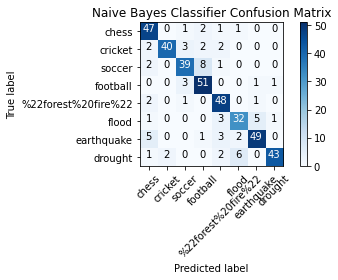

In [24]:
#Multiclass Classification
#Import for Classifier metrics Calculation- from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
def Classifier_Metrics_Multiclass(y_test,y_pred,name="",average='macro'):
    print("Accuracy score for %s: %f" %(name,accuracy_score(y_test,y_pred)))
    print("Recall score for %s: %f" % (name,recall_score(y_test,y_pred,average=average)))
    print("Precision score for %s: %f" % (name,precision_score(y_test,y_pred,average=average)))
    print("F-1 score for %s: %f" % (name,f1_score(y_test,y_pred,average=average)))

MC_labels_Train=mtrain.leaf_label.values
MC_labels_Test=mtest.leaf_label.values
X_True_mTrain=[]
MCN_labels_Train=[]

#Making True Train and Test labels compatible for Classification
for label in MC_labels_Train:
    if label == 'chess':
        MCN_labels_Train.append(0)
    elif label == 'cricket':
        MCN_labels_Train.append(1)
    elif label == 'soccer':
        MCN_labels_Train.append(2)
    elif label == 'football':
        MCN_labels_Train.append(3)
    elif label == 'flood':
        MCN_labels_Train.append(5)
    elif label == 'earthquake':
        MCN_labels_Train.append(6)
    elif label == 'drought':
        MCN_labels_Train.append(7)
    else:
        MCN_labels_Train.append(4)

MCN_labels_Test=[]
#Making True Train and Test labels compatible for Classification
for label in MC_labels_Test:
    if label == 'chess':
        MCN_labels_Test.append(0)
    elif label == 'cricket':
        MCN_labels_Test.append(1)
    elif label == 'soccer':
        MCN_labels_Test.append(2)
    elif label == 'football':
        MCN_labels_Test.append(3)
    elif label == 'flood':
        MCN_labels_Test.append(5)
    elif label == 'earthquake':
        MCN_labels_Test.append(6)
    elif label == 'drought':
        MCN_labels_Test.append(7)
    else:
        MCN_labels_Test.append(4)

Mclass_names = ["chess", "cricket", "soccer", "football", "%22forest%20fire%22", "flood", "earthquake", "drought"]
GNB = GaussianNB()
GNB_pred_Y = GNB.fit(x_LSI_mtrain,MCN_labels_Train).predict(X_LSI_mtest) 
Classifier_Metrics_Multiclass(MCN_labels_Test, GNB_pred_Y, name="Naive Bayes Classifier")
GNB_pred_Y_cm = confusion_matrix(MCN_labels_Test,GNB_pred_Y)
plt.figure() 
plot_confusion_matrix(GNB_pred_Y_cm, classes=Mclass_names, title='Naive Bayes Classifier Confusion Matrix') 

In [47]:
#Multiclass Classification
svm_ovo = OneVsOneClassifier(SVC(kernel = 'linear', random_state=42))
param_grid = {'estimator__C': [0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]}

grid_svm_mc = GridSearchCV(svm_ovo, param_grid, cv=5, scoring='accuracy')
grid_svm_mc.fit(x_LSI_mtrain, MCN_labels_Train)
print(grid_svm_mc.best_estimator_)

svm_ovr = OneVsRestClassifier(SVC(kernel = 'linear', random_state=42, class_weight = 'balanced'))
param_grid = {'estimator__C': [0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]}

grid_svm_mc = GridSearchCV(svm_ovr, param_grid, cv=5, scoring='accuracy')
grid_svm_mc.fit(x_LSI_mtrain, MCN_labels_Train)
print(grid_svm_mc.best_estimator_)

OneVsOneClassifier(estimator=SVC(C=100, kernel='linear', random_state=42))
OneVsRestClassifier(estimator=SVC(C=100, class_weight='balanced',
                                  kernel='linear', random_state=42))


Accuracy score for One vs One SVM: 0.927711
Recall score for One vs One SVM: 0.929219
Precision score for One vs One SVM: 0.927608
F-1 score for One vs One SVM: 0.927430
Accuracy score for One vs Rest SVM: 0.913253
Recall score for One vs Rest SVM: 0.915646
Precision score for One vs Rest SVM: 0.913336
F-1 score for One vs Rest SVM: 0.912852


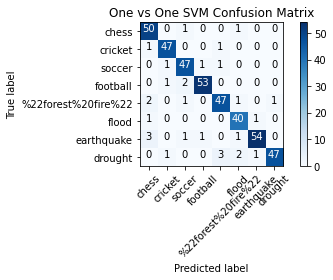

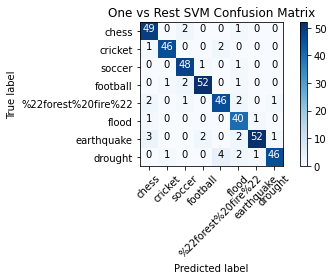

In [25]:
#Multiclass Classification

svm_ovo = OneVsOneClassifier(SVC(kernel = 'linear', random_state=42, C=100))
pred_svm_mc = svm_ovo.fit(x_LSI_mtrain, MCN_labels_Train).predict(X_LSI_mtest)

Classifier_Metrics_Multiclass(MCN_labels_Test, pred_svm_mc, name="One vs One SVM")
pred_svm_mc_cm = confusion_matrix(MCN_labels_Test,pred_svm_mc)
plt.figure() 
plot_confusion_matrix(pred_svm_mc_cm, classes=Mclass_names, title='One vs One SVM Confusion Matrix') 

svm_ovr = OneVsRestClassifier(SVC(kernel = 'linear', random_state=42, class_weight = 'balanced', C=100))
pred_svm_mc=svm_ovr.fit(x_LSI_mtrain, MCN_labels_Train).predict(X_LSI_mtest)

Classifier_Metrics_Multiclass(MCN_labels_Test, pred_svm_mc, name="One vs Rest SVM")
pred_svm_mc_cm = confusion_matrix(MCN_labels_Test,pred_svm_mc)
plt.figure() 
plot_confusion_matrix(pred_svm_mc_cm, classes=Mclass_names, title='One vs Rest SVM Confusion Matrix') 


Accuracy score for One vs One SVM: 0.942169
Recall score for One vs One SVM: 0.942105
Precision score for One vs One SVM: 0.942447
F-1 score for One vs One SVM: 0.941733
Accuracy score for One vs Rest SVM: 0.946988
Recall score for One vs Rest SVM: 0.947574
Precision score for One vs Rest SVM: 0.947059
F-1 score for One vs Rest SVM: 0.946907


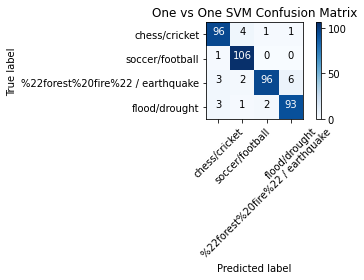

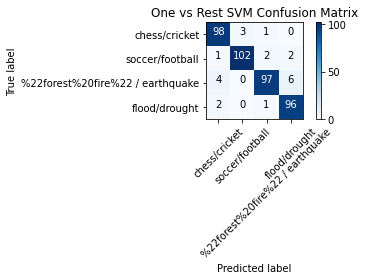

In [10]:
#Multiclass Classification

#Subsampling Techniques
#Multiclass Classification

#Merging Semantic labels
MCN_labels_Train=[]

#Making True Train and Test labels compatible for Binary Classification
for label in MC_labels_Train:
    if label == 'chess' or label == 'cricket':
        MCN_labels_Train.append(0)
    elif label == 'soccer' or label== 'football':
        MCN_labels_Train.append(1)

    elif label == 'flood' or label== 'drought':
        MCN_labels_Train.append(2)
    elif label == 'earthquake':
        MCN_labels_Train.append(3)
    else:
        MCN_labels_Train.append(3)

MCN_labels_Test=[]
#Making True Train and Test labels compatible for Binary Classification
for label in MC_labels_Test:
    if label == 'chess' or label == 'cricket':
        MCN_labels_Test.append(0)
    elif label == 'soccer' or label== 'football':
        MCN_labels_Test.append(1)
    elif label == 'flood' or label== 'drought':
        MCN_labels_Test.append(2)
    elif label == 'earthquake':
        MCN_labels_Test.append(3)
    else:
        MCN_labels_Test.append(3)

Mclass_names = ["chess/cricket", "soccer/football", "%22forest%20fire%22 / earthquake", "flood/drought"]

svm_ovo = OneVsOneClassifier(SVC(kernel = 'linear', random_state=42, C=100))
pred_svm_mc=svm_ovo.fit(x_LSI_mtrain, MCN_labels_Train).predict(X_LSI_mtest)

Classifier_Metrics_Multiclass(MCN_labels_Test, pred_svm_mc, name="One vs One SVM")
pred_svm_mc_cm = confusion_matrix(MCN_labels_Test,pred_svm_mc)
plt.figure() 
plot_confusion_matrix(pred_svm_mc_cm, classes=Mclass_names, title='One vs One SVM Confusion Matrix') 

#Introduce Subsampling in Pipeline
pipe = Pipeline([('sampl', SMOTEENN(sampling_strategy='all', random_state=42)), 
                 ('clf', SVC(kernel = 'linear', random_state=42, C=100))])

svm_ovr = OneVsRestClassifier(pipe)
pred_svm_mc=svm_ovr.fit(x_LSI_mtrain, MCN_labels_Train).predict(X_LSI_mtest)

Classifier_Metrics_Multiclass(MCN_labels_Test, pred_svm_mc, name="One vs Rest SVM")
pred_svm_mc_cm = confusion_matrix(MCN_labels_Test,pred_svm_mc) # Hard SVM Confusion matrix
plt.figure() 
plot_confusion_matrix(pred_svm_mc_cm, classes=Mclass_names, title='One vs Rest SVM Confusion Matrix') 


# This pipeline will resample the data and  
# pass the output to SVM


# OVR will transform the `y` as you know and 
# then pass single label data to different copies of pipe 
# multiple times (as many labels in data)

# Question 10


In [26]:
embeddings_dict = {}
with open("glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

from scipy import spatial
def find_similar_word(emmbedes, emmbed_dict):
    nearest = sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
    return nearest

print(find_similar_word(embeddings_dict['running'], embeddings_dict)[0:10])

glove_name = 'glove.6B.300d.txt'
word2vec_output_file = glove_name +'.word2vec'
glove2word2vec(glove_name, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

result = model.similar_by_word("king")
print("king is similar to {}: {:.4f}".format(*result[0]))

['running', 'ran', 'run', 'instead', 'well', 'coming', '.', 'again', 'going', 'while']
king is similar to queen: 0.6336


In [27]:
print(np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king']-embeddings_dict['wife']+embeddings_dict['husband']))
print(np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king']))
print(np.linalg.norm(embeddings_dict['wife']-embeddings_dict['husband']))

6.165036
5.966258
3.1520464


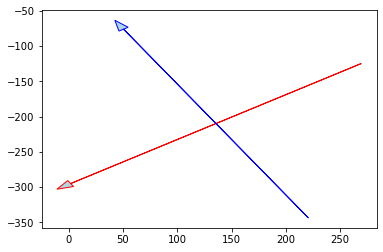

In [28]:
words = ['queen', 'king', 'wife', 'husband']
words_embed = [embeddings_dict['queen'], embeddings_dict['king'], embeddings_dict['wife'], embeddings_dict['husband']]

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
result = tsne.fit_transform(words_embed)
ax = plt.axes()
ax.arrow(result[0][0], result[0][1], result[1][0] - result[0][0], result[1][1] - result[0][1], head_width = 10, fc='lightblue', ec='red')
ax.arrow(result[2][0], result[2][1], result[3][0] - result[2][0], result[3][1] - result[2][1], head_width = 10, fc='lightblue', ec='blue')
plt.show()

# Question 11

For the binary classification task distinguishing the “sports” class and “climate”
class:
(a) Describe a feature engineering process that uses GLoVE word embeddings to represent each
document. You have to abide by the following rules:
• A representation of a text segment needs to have a vector dimension that CANNOT
exceed the dimension of the GLoVE embedding used per word of the segment.
• You cannot use TF-IDF scores (or any measure that requires looking at the complete
dataset) as a pre-processing routine.
• Important: In this section, feel free to use raw features from any column in the original
data file not just full text. The column keywords might be useful.
• To aggregate these words into a single vector consider normalizing the final vectors.
(b) Select a classifier model, train and evaluate it with your GLoVE-based feature.

0.001: 0.500906344 accuracy with a standard deviation of 0.00
0.010: 0.888949150 accuracy with a standard deviation of 0.01
0.100: 0.896188986 accuracy with a standard deviation of 0.01
1.000: 0.929377935 accuracy with a standard deviation of 0.01
10.000: 0.941449787 accuracy with a standard deviation of 0.01
100.000: 0.939629818 accuracy with a standard deviation of 0.02
1000.000: 0.939032869 accuracy with a standard deviation of 0.01
10000.000: 0.939032869 accuracy with a standard deviation of 0.01
100000.000: 0.939032869 accuracy with a standard deviation of 0.01
1000000.000: 0.939032869 accuracy with a standard deviation of 0.01
Best Gamma:  10
Accuracy score for SVM: 0.946988
Recall score for SVM: 0.917476
Precision score for SVM: 0.974227
F-1 score for SVM: 0.945000


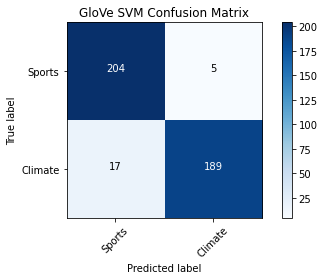

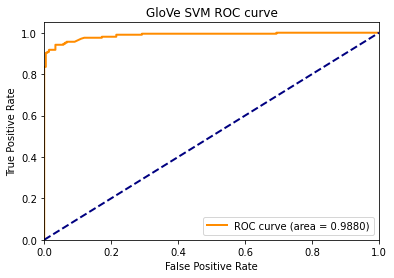

In [29]:
def transform_glove(data, model):
    dim = len(model.get_vector("king"))

    X = np.zeros((len(data), dim))
    n = 0
    for sentence in data['clean']:
        tokens = sentence.split()
        vecs = []
        for word in tokens:
            try:
                vec = model.get_vector(word)
                vecs.append(vec)
            except KeyError:
                pass
        if len(vecs) > 0:
            vecs = np.array(vecs)
            X[n] = vecs.mean(axis=0)
        n += 1
    
    Y = np.zeros((len(data), dim))
    n = 0
    for sentence in data['keywords']:
        tokens = sentence.split()
        vecs = []
        for word in tokens:
            try:
                vec = model.get_vector(word)
                vecs.append(vec)
            except KeyError:
                pass
        if len(vecs) > 0:
            vecs = np.array(vecs)
            Y[n] = vecs.mean(axis=0)
        n += 1
        
    Z = np.zeros((len(data), dim))
    n = 0
    for sentence in data['summary']:
        tokens = sentence.split()
        vecs = []
        for word in tokens:
            try:
                vec = model.get_vector(word)
                vecs.append(vec)
            except KeyError:
                pass
        if len(vecs) > 0:
            vecs = np.array(vecs)
            Z[n] = vecs.mean(axis=0)
        n += 1
    
    for i in range(0, len(data)):
        for j in range(0, dim):
            X[i][j] = (X[i][j] + Y[i][j] + Z[i][j]) / 3
    
    return X

embeddings_dict = {}
dimension_of_glove = 300
with open("glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

glove_name = 'glove.6B.300d.txt'
word2vec_output_file = glove_name +'.word2vec'
glove2word2vec(glove_name, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)        

train_glove = train[['clean', 'keywords', 'summary']]
train_glove_transformed = transform_glove(train_glove, model) 

test_glove = test[['clean', 'keywords', 'summary']]
test_glove_transformed = transform_glove(test_glove, model)

class_names=["Sports","Climate"]

gamma=[0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]

best_gamma = 0.001
best_accuracy = 0

# Cross validation/scoring should happen on the training data
for g in gamma:
    Glove_SVM = SVC(kernel='linear',C=g, random_state=42)  
    scores = cross_val_score(Glove_SVM, train_glove_transformed, X_True_Train, cv=5)
    print("%0.3f: %0.9f accuracy with a standard deviation of %0.2f" % (g, scores.mean(), scores.std()))
    if scores.mean() > best_accuracy:
        best_accuracy = scores.mean()
        best_gamma = g

print('Best Gamma: ', best_gamma)

Glove_SVM = SVC(kernel='linear',C=best_gamma, random_state=42)   
X_Glove_SVM_pred = Glove_SVM.fit(train_glove_transformed, X_True_Train).predict(test_glove_transformed)
Classifier_Metrics(X_True_Test, X_Glove_SVM_pred, name="SVM")
Best_SVM_cm = confusion_matrix(X_True_Test, X_Glove_SVM_pred) 
plt.figure()
plot_confusion_matrix(Best_SVM_cm, classes = class_names, title='GloVe SVM Confusion Matrix') 
ROC_curve(X_True_Test, Glove_SVM.decision_function(test_glove_transformed), name="GloVe SVM")

# Question 12
Plot the relationship between the dimension of the pre-trained GLoVE embedding
and the resulting accuracy of the model in the classification task. Describe the observed trend. Is
this trend expected? Why or why not? In this part use the different sets of GLoVE vectors from the
link.

In [34]:
def glove_svm(train, test, X_True_Train, X_True_Test, embeddings_dict):
    train_glove = train[['clean', 'keywords', 'summary']]
    train_glove_transformed = transform_glove(train_glove, embeddings_dict) 

    test_glove = test[['clean', 'keywords', 'summary']]
    test_glove_transformed = transform_glove(test_glove, embeddings_dict)

    class_names=["Sports","Climate"]
    Glove_SVM = SVC(kernel='linear',C=best_gamma, random_state=42)   

    X_Glove_SVM_pred = Glove_SVM.fit(train_glove_transformed, X_True_Train).predict(test_glove_transformed)
    return accuracy_score(X_True_Test,X_Glove_SVM_pred)

embeddings = []

embeddings_dict = {}
with open("glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
glove_name = 'glove.6B.50d.txt'
word2vec_output_file = glove_name +'.word2vec'
glove2word2vec(glove_name, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)  
embeddings.append(model)

embeddings_dict = {}
with open("glove.6B.100d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
glove_name = 'glove.6B.100d.txt'
word2vec_output_file = glove_name +'.word2vec'
glove2word2vec(glove_name, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)  
embeddings.append(model)

embeddings_dict = {}
with open("glove.6B.200d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
glove_name = 'glove.6B.200d.txt'
word2vec_output_file = glove_name +'.word2vec'
glove2word2vec(glove_name, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)  
embeddings.append(model)

embeddings_dict = {}
with open("glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
glove_name = 'glove.6B.300d.txt'
word2vec_output_file = glove_name +'.word2vec'
glove2word2vec(glove_name, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)  
embeddings.append(model)

accuracy = []
for embedding in embeddings:
    acc = glove_svm(train, test, X_True_Train, X_True_Test, embedding)
    print(acc)
    accuracy.append(acc)

0.9325301204819277
0.9421686746987952
0.946987951807229
0.9493975903614458


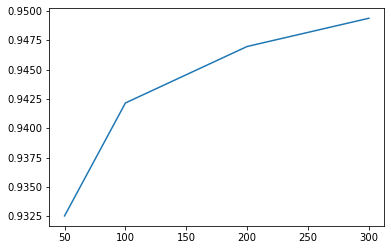

In [33]:
counts = [50, 100, 200, 300]
plt.plot(counts, accuracy);
plt.show()

# QUESTION 13: 
Compare and contrast the two visualizations. Are there clusters formed in either
or both of the plots? We will pursue the clustering aspect further in the next project.

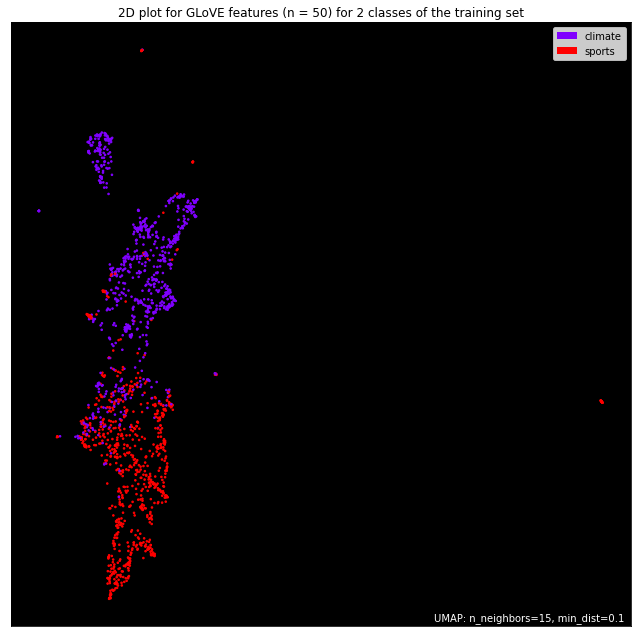

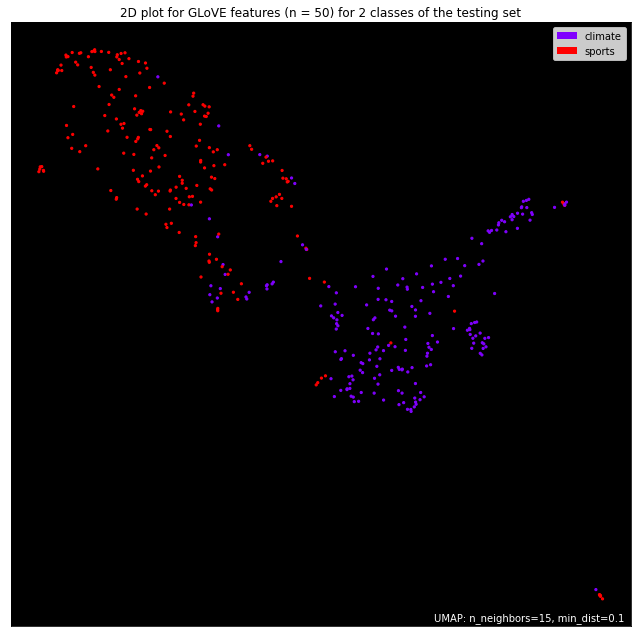

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


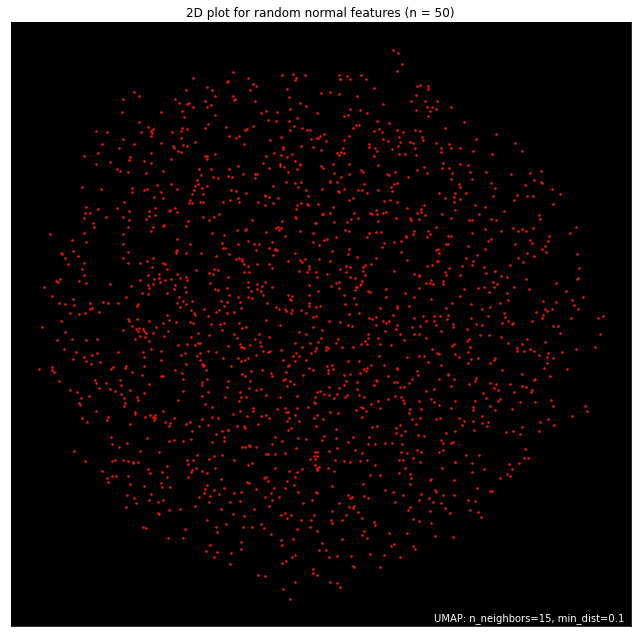

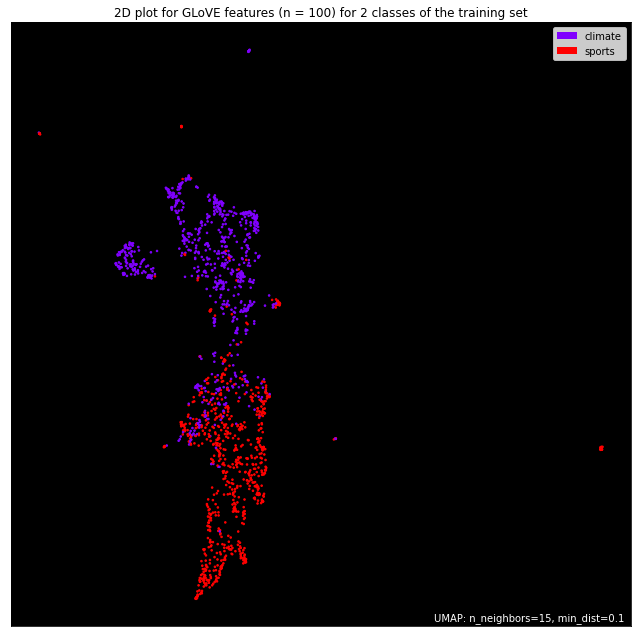

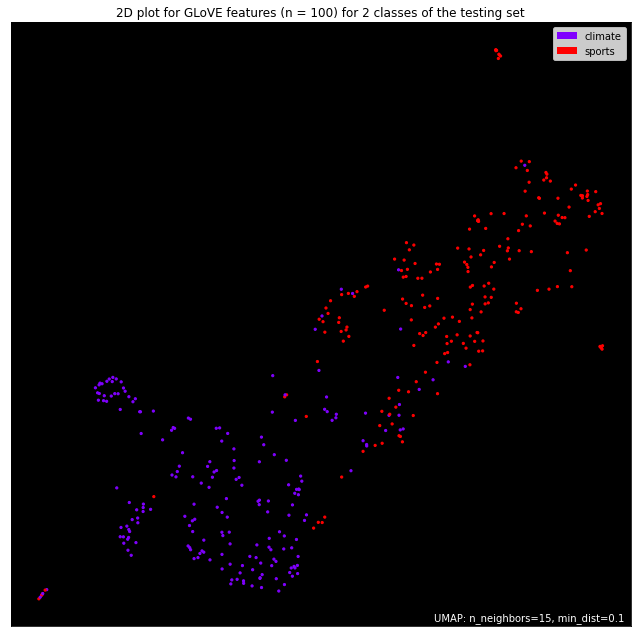

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


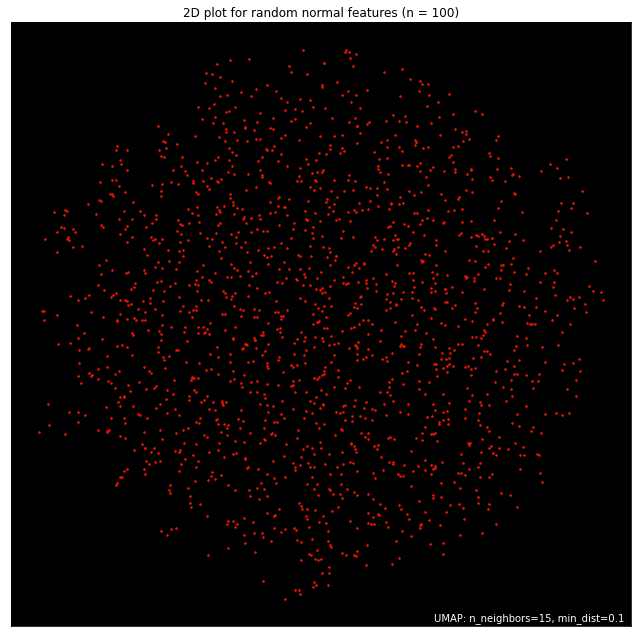

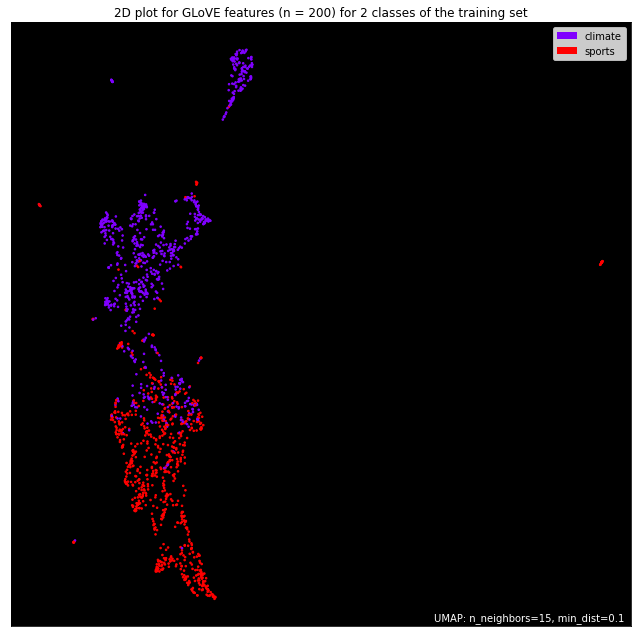

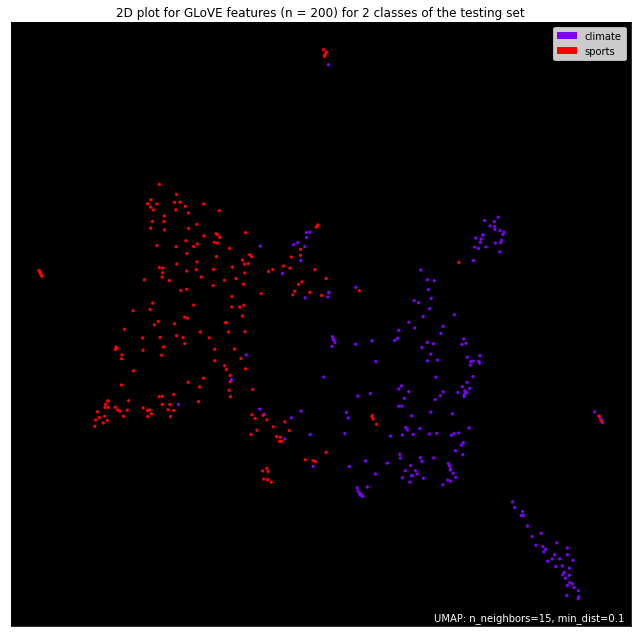

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


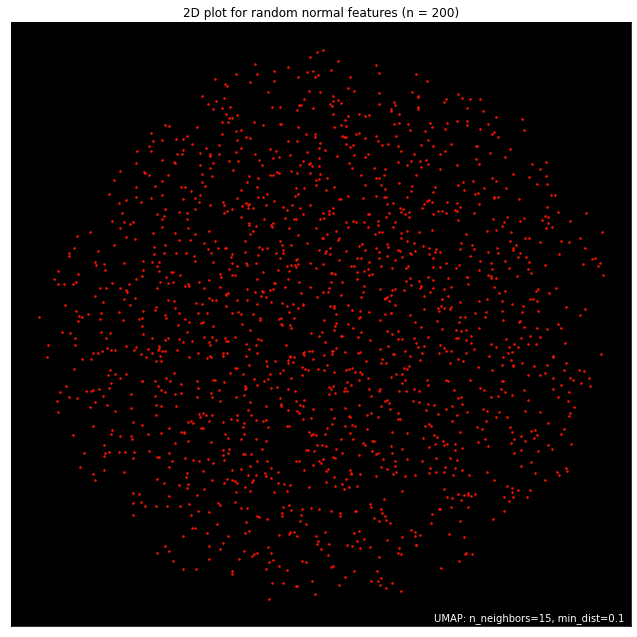

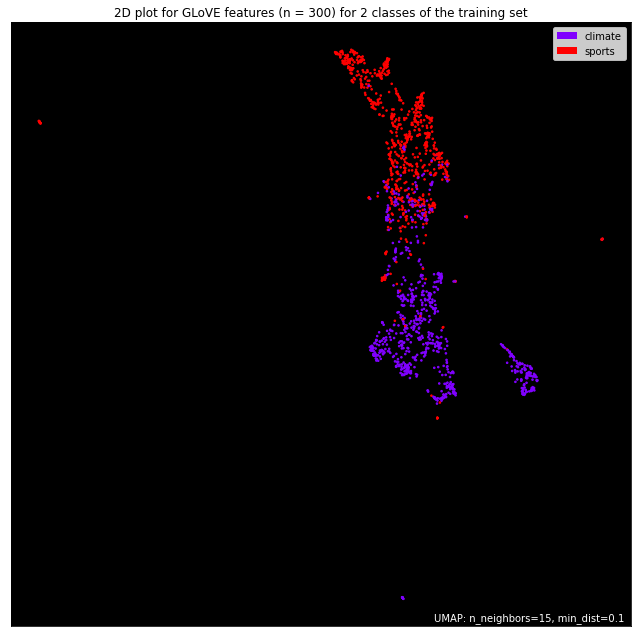

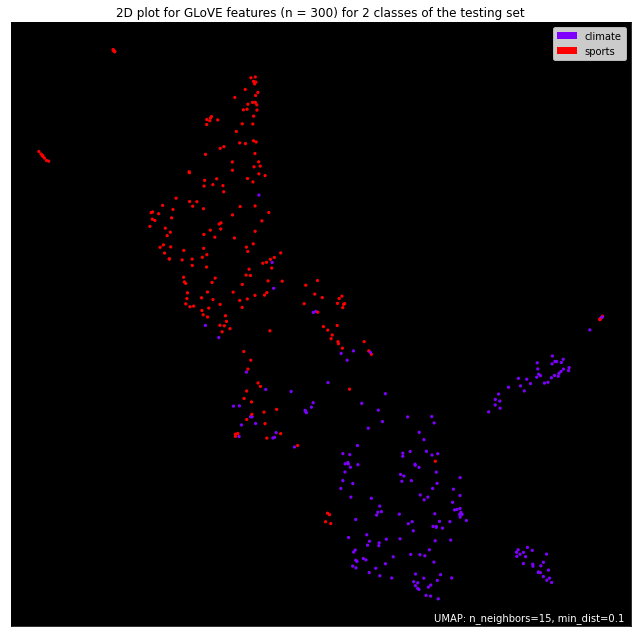

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


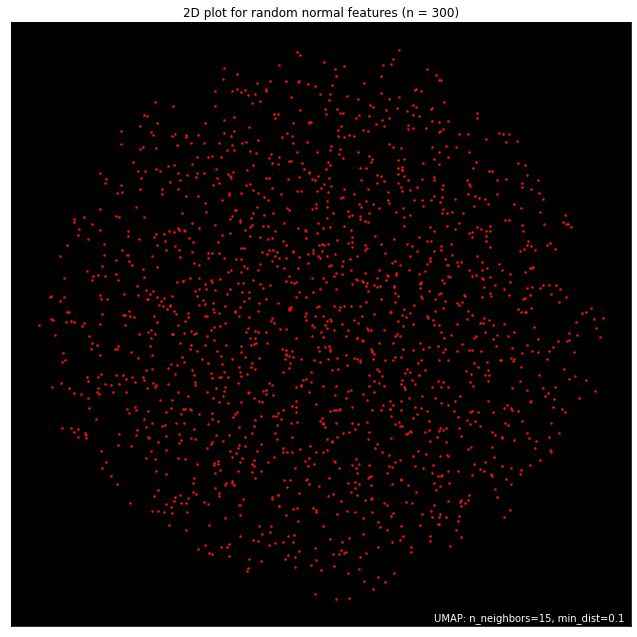

In [27]:
def umap_plot(train, test, X_True_Train, X_True_Test, embeddings_dict, dim):
    train_glove = train[['clean', 'keywords', 'summary']]
    train_glove_transformed = transform_glove(train_glove, embeddings_dict) 

    test_glove = test[['clean', 'keywords', 'summary']]
    test_glove_transformed = transform_glove(test_glove, embeddings_dict)

    class_names=["Sports","Climate"]
    
    dim_embedding = umap.UMAP(n_components=2, metric='euclidean').fit(train_glove_transformed)

    f = umap.plot.points(dim_embedding, labels=np.array(X_True_Train), theme='fire')
    plt.title('2D plot for GLoVE features (n = ' + str(dim) + ') for 2 classes of the training set')
    plt.show()

    dim_embedding = umap.UMAP(n_components=2, metric='euclidean').fit(test_glove_transformed)

    f = umap.plot.points(dim_embedding, labels=np.array(X_True_Test), theme='fire')
    plt.title('2D plot for GLoVE features (n = ' + str(dim) + ') for 2 classes of the testing set')
    plt.show()

    s = np.random.normal(0, 1, train_glove_transformed.shape)
    s = s / np.linalg.norm(s)
    reduced_dim_s = umap.UMAP(n_components=2, metric='euclidean').fit(s)
    
    f = umap.plot.points(reduced_dim_s, theme='fire')
    plt.title('2D plot for random normal features (n = ' + str(dim) + ')')
    plt.show()
    
counts = [50, 100, 200, 300]
i = 0
for embedding in embeddings:
    umap_plot(train, test, train.root_label.values, test.root_label.values, embedding, counts[i])
    i = i + 1